<a href="https://colab.research.google.com/github/soutteman/Datascientest_Energie/blob/main/DataViz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Préparation de l'environnement et du fichier

In [ ]:
# FACULTATIF
# à utiliser dans google colab
# uploader un fichier local depuis l'ordinateur

from google.colab import files
uploaded = files.upload()

Saving eco2mix_clean.csv to eco2mix_clean (1).csv


In [ ]:
# Import des bibliothèques nécessaires
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.core.dtypes.common import is_numeric_dtype

# Lecture du fichier CSV
df = pd.read_csv("eco2mix_clean.csv", sep=',', low_memory=False)

# Affichage flottant plus lisible
np.set_printoptions(suppress=True)    # Affichage sans notation scientifique (ex : 1.23e+05 devient 123000.00)
pd.set_option('display.float_format', lambda x: '%.2f' % x)    # Affichage des nombres à virgule avec 2 décimales dans les DataFrames
pd.set_option('display.max_columns', None)    # Affiche toutes les colonnes du DataFrame dans le notebook (même si elles sont nombreuses)

# Conversion des types
df['Date'] = pd.to_datetime(df['Date'])  # colonne Date -> datetime
df['Code INSEE région'] = df['Code INSEE région'].astype('str')  # colonne Code INSEE -> string

# Aperçu du DataFrame
df.head()


,Code INSEE région,Région,Date,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),TCO Thermique (%),TCH Thermique (%),TCO Nucléaire (%),TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),JourSemaine,PROD,CONSO,Année_mois,Année,Mois
0,11,Île-de-France,2013-01-01,399392.00,32478.00,508590.97,340.00,100.00,0.00,117.50,6333.00,360051.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,47,547841.97,399274.50,2013-01,2013,1
1,11,Île-de-France,2013-01-02,492157.00,33589.00,532984.06,83.00,121.00,0.00,96.00,6016.00,452266.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,96,572793.06,492061.00,2013-01,2013,1
2,11,Île-de-France,2013-01-03,487111.00,42885.00,531158.23,120.00,16.00,0.00,1152.00,6136.00,437869.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,144,580315.23,485959.00,2013-01,2013,1
3,11,Île-de-France,2013-01-04,470053.00,34260.00,527388.41,12.00,15.00,0.00,15600.00,6273.00,429408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,192,567948.41,454453.00,2013-01,2013,1
4,11,Île-de-France,2013-01-05,433732.00,33634.00,521453.96,4.00,13.00,0.00,96.00,6585.00,393424.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,240,561689.96,433636.00,2013-01,2013,1


In [ ]:
# Répartir les colonnes en 3 groupes : numériques, catégorielles et temporelles
col_num = [
    'Consommation (MW)', 'Nucléaire (MW)', 'Thermique (MW)', 'Eolien (MW)',
    'Solaire (MW)', 'Hydraulique (MW)', 'Bioénergies (MW)', 'Pompage (MW)', 'Ech. physiques (MW)',
    'TCO Nucléaire (%)', 'TCH Nucléaire (%)',
    'TCO Thermique (%)', 'TCH Thermique (%)',
    'TCO Eolien (%)', 'TCH Eolien (%)',
    'TCO Hydraulique (%)', 'TCH Hydraulique (%)',
    'TCO Solaire (%)', 'TCH Solaire (%)',
    'TCO Bioénergies (%)', 'TCH Bioénergies (%)',
    'PROD', 'CONSO'
]

col_cat = ['Code INSEE région', 'Région']

col_temp = ['Date', 'Hour', 'JourSemaine', 'Année_mois', 'Année', 'Mois']

# Groupes spécifiques : regroupement des colonnes de TCH, de TCO, de MW, de production d'énergie, et de production d'énergies renouvelables
col_TCH = ['TCH Nucléaire (%)','TCH Thermique (%)','TCH Eolien (%)','TCH Hydraulique (%)','TCH Solaire (%)','TCH Bioénergies (%)']

col_TCO = ['TCO Nucléaire (%)','TCO Thermique (%)','TCO Eolien (%)','TCO Hydraulique (%)','TCO Solaire (%)','TCO Bioénergies (%)']

col_MW = [
    'Consommation (MW)', 'Nucléaire (MW)', 'Thermique (MW)', 'Eolien (MW)',
    'Solaire (MW)', 'Hydraulique (MW)', 'Bioénergies (MW)', 'Pompage (MW)', 'Ech. physiques (MW)'
]

col_production = ['Nucléaire (MW)', 'Thermique (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)', 'Bioénergies (MW)']

col_renouvelables = ['Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)', 'Bioénergies (MW)']


# Statistiques descriptives : analyse des variables numériques

In [ ]:
# Analyse des variables numériques

# On affiche les statistiques descriptives de toutes les colonnes numériques : min, max, moyenne, écart-type, quartiles, etc.
df[col_num].describe().T

# Interprétation :

# La consommation moyenne est d’environ 214 415 MW, avec un maximum de 656 890 MW. Cela indique des pics importants à certaines périodes.
# Le nucléaire est de loin la principale source de production (moyenne ~283 950 MW), suivi par le thermique (~18 284 MW) et l’hydraulique (~28 249 MW).
# La production solaire et bioénergies est plus faible (moyennes de  4 666 MW et 4 072 MW).
# Le pompage a une moyenne positive (3 939 MW) : les valeurs ont déjà été remises en valeur absolue lors du nettoyage.
# Les échanges physiques sont très variables, allant de -533 963 à +585 849 MW, ce qui montre l’intensité des importations/exportations entre régions.

# Les colonnes TCH (%) (taux de charge) respectent bien leur obligations d'être ≤ 100 %. Par exemple, TCH Nucléaire max = 100 % et TCH Solaire = 34.22 %.
# Cela confirme que les anomalies > 100 % ont été corrigées lors du nettoyage précédent.

# Les colonnes TCO (%) (taux de couverture) peuvent logiquement dépasser 100 % :
# TCO Nucléaire (%) atteint 664.94 %, ce qui indique une très forte production nucléaire excédentaire dans certaines régions qui exportent leur électricité vers d'autres régions.
# Même chose pour TCO Eolien (102.19 %), donc il y a parfois une surproduction locale.

# Enfin, les colonnes PROD et CONSO montrent une bonne cohérence :
# La production moyenne est supérieure à la consommation moyenne (351 823 MW vs 210 476 MW), ce qui indique un excédent global d'énergie.
# Cet excédent indique une redistribution de l'énergie produite entre régions françaises.


,count,mean,std,min,25%,50%,75%,max
Consommation (MW),43824.00,214414.70,101102.91,59592.00,131977.75,196810.00,275905.25,656890.00
Nucléaire (MW),43824.00,283949.52,159269.70,0.00,164010.62,294206.23,411308.79,651959.00
Thermique (MW),43824.00,18284.33,24950.62,0.00,1267.75,8093.50,24374.25,183730.00
Eolien (MW),43824.00,12603.57,19704.85,0.00,1994.00,6028.50,14918.50,230038.00
Solaire (MW),43824.00,4666.12,6320.41,0.00,805.00,2039.00,5951.00,51206.00
Hydraulique (MW),43824.00,28248.56,46455.78,0.00,294.00,3439.00,41859.25,281005.00
Bioénergies (MW),43824.00,4071.84,2154.63,236.00,2356.00,3692.50,5613.00,14916.00
Pompage (MW),43824.00,3938.80,7905.11,0.00,0.00,278.85,4793.25,75233.00
Ech. physiques (MW),43824.00,-21188.16,204246.58,-533963.00,-199393.75,25573.00,104621.75,585849.00
TCO Nucléaire (%),43824.00,31.01,77.73,0.00,0.00,0.00,0.00,664.94


<Axes: >

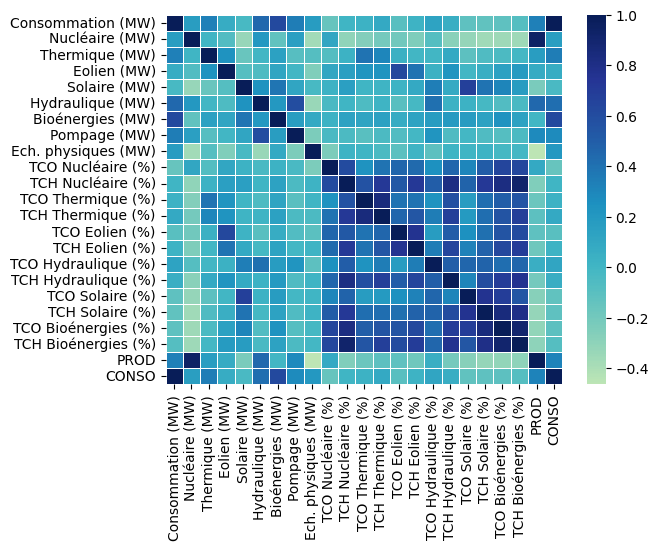

In [ ]:
# Matrice de corrélation entre les valeurs numériques
sns.heatmap(df[col_num].corr(),
            cmap="YlGnBu",        # palette de couleur comme dans le rapport
            center=0,             # centrer la palette autour de 0
            linewidths=0.5,       # ajouter des séparateurs visibles
            linecolor='white')    # couleur des lignes de séparation

# Interprétation :
# La matrice de corrélation montre en bleu foncé qu’il y a des corrélations fortes à modérées entre :
#
# - la production totale et la production nucléaire, et hydraulique dans une moindre mesure,
#   ce qui pourrait être expliqué par l’importance de ces deux filières de production
#   dans la production totale ;
#
# - le TCO éolien et la production éolienne ou le TCO nucléaire et la production nucléaire,
#   ce qui s’explique par le fait que lorsque la production augmente, le taux de couverture
#   des régions par cette filière est meilleur ; les paires TCO - TCH de la plupart des filières
#   sont elles aussi corrélées, pour la même raison.
#
# L’éolien et le solaire, des énergies renouvelables, ne sont quasiment pas corrélés.
# Cela peut signifier qu’elles sont indépendantes et aléatoires, fortement influencées par la météo.
#
# Globalement, les corrélations sont plutôt faibles dans notre jeu de données,
# ce qui pourrait témoigner de la diversité et de la complémentarité des sources d’énergies.


# Evolution de la production et de la consommation

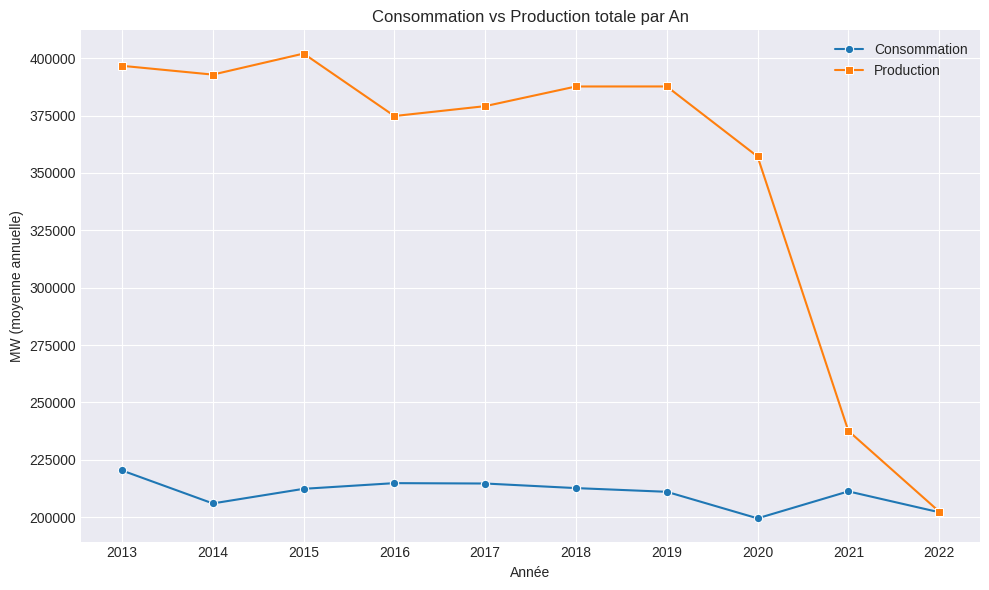

In [ ]:
# Consommation vs Production totale par an
# Calcul de la moyenne par an
df_An = df.groupby('Année')[['CONSO', 'PROD']].mean().reset_index()

# Tracer le graphique
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_an, x='Année', y='CONSO', marker='o', label='Consommation')
sns.lineplot(data=df_an, x='Année', y='PROD', marker='s', label='Production')

plt.title("Consommation vs Production totale par An")
plt.xlabel("Année")
plt.ylabel("MW (moyenne annuelle)")
plt.xticks(range(2013, 2023))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

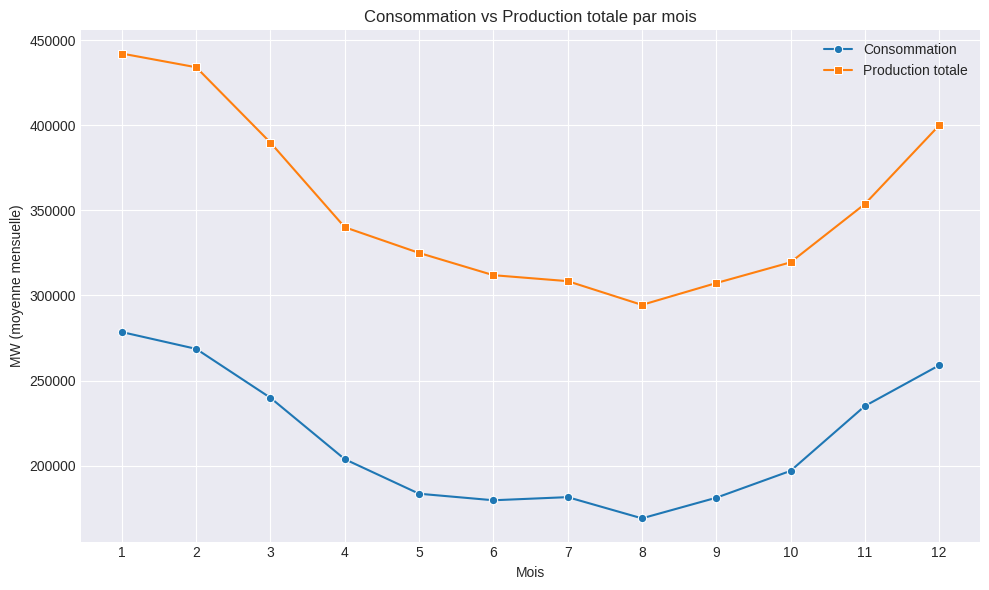

In [ ]:
# Consommation vs Production totale par mois
# Calcul de la moyenne par mois
df_mois = df.groupby('Mois')[['Consommation (MW)', 'PROD']].mean().reset_index()

# Tracer le graphique
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_mois, x='Mois', y='Consommation (MW)', marker='o', label='Consommation')
sns.lineplot(data=df_mois, x='Mois', y='PROD', marker='s', label='Production totale')

plt.title("Consommation vs Production totale par mois")
plt.xlabel("Mois")
plt.ylabel("MW (moyenne mensuelle)")
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# comme on peut s'y attendre la consommation est au plus haut pendant les mois d'hiver, et baisse en été

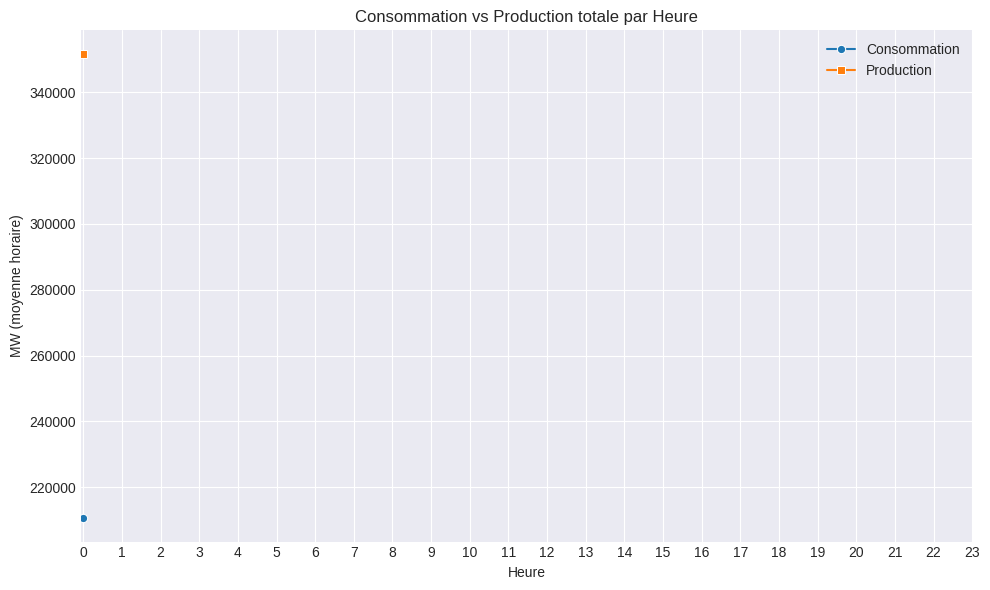

In [ ]:
# Consommation vs Production totale par heure

# Tracer le graphique
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_heure, x='Hour', y='CONSO', marker='o', label='Consommation')
sns.lineplot(data=df_heure, x='Hour', y='PROD', marker='s', label='Production')

# Titres et légendes
plt.title("Consommation vs Production totale par Heure")
plt.xlabel("Heure")
plt.ylabel("MW (moyenne horaire)")
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Le graphique ne s'exécute pas parce qu'on a enlevé la colonne Hour



# Répartition régionale

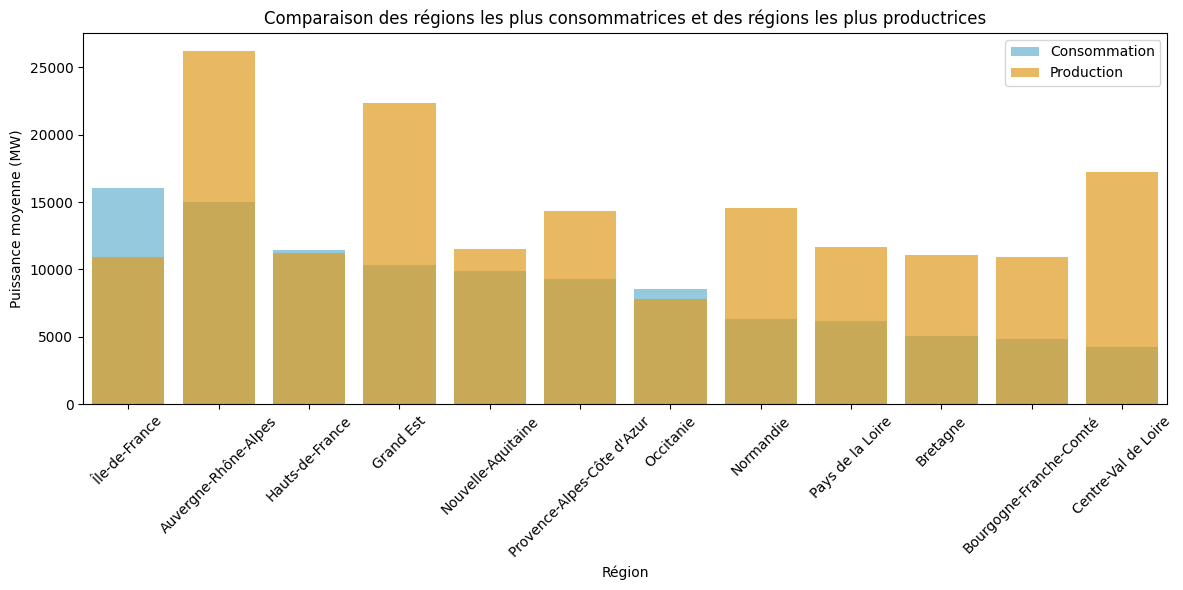

In [ ]:
# Régions les plus consommatrices et régions les plus productrices
# Objectif métier : identifier les régions qui consomment beaucoup d'énergie et les régions productrices nettes, pour prévoir les échanges d'énergie entre les régions.
# ça permet de savoir quelles régions ne sont pas autonomes en production d'énergie et ont besoin de l'énergie des autres régions.

# Regrouper par région
region_stats = df.groupby("Région")[["Consommation (MW)", "PROD"]].mean().reset_index()

# Trier pour affichage côte à côte
region_stats = region_stats.sort_values("Consommation (MW)", ascending=False)

# Initialisation du tracé
plt.figure(figsize=(12, 6))

# Courbe 1 : Consommation
sns.barplot(data=region_stats, x="Région", y="Consommation (MW)", color="skyblue", label="Consommation")

# Courbe 2 : Production
sns.barplot(data=region_stats, x="Région", y="PROD", color="orange", label="Production", alpha=0.7)

plt.xticks(rotation=45)
plt.ylabel("Puissance moyenne (MW)")
plt.title("Comparaison des régions les plus consommatrices et des régions les plus productrices")
plt.legend()
plt.tight_layout()
plt.show()

# Le graphique montre que des régions comme l’Auvergne-Rhône-Alpes, le Grand Est et le Centre-Val de Loire produisent beaucoup plus d’électricité qu’elles n’en consomment.
# D'autres régions comme la Provence-Alpes-Côte d’Azur ou la Normandie par exemple produisent légèrement plus qu'elles ne consomment.
# Les Hauts-de-France sont à l'équilibre.
# L’Île-de-France consomment plus qu’elle ne produit à cause de sa forte population et son activité économique, donc elle est dépendante de l'électricité des autres régions, qui lui est acheminée par le réseau.

C:\Users\Laurie\AppData\Local\Temp\ipykernel_15316\2713618539.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_stats, x="Région", y="Ratio", palette="coolwarm")


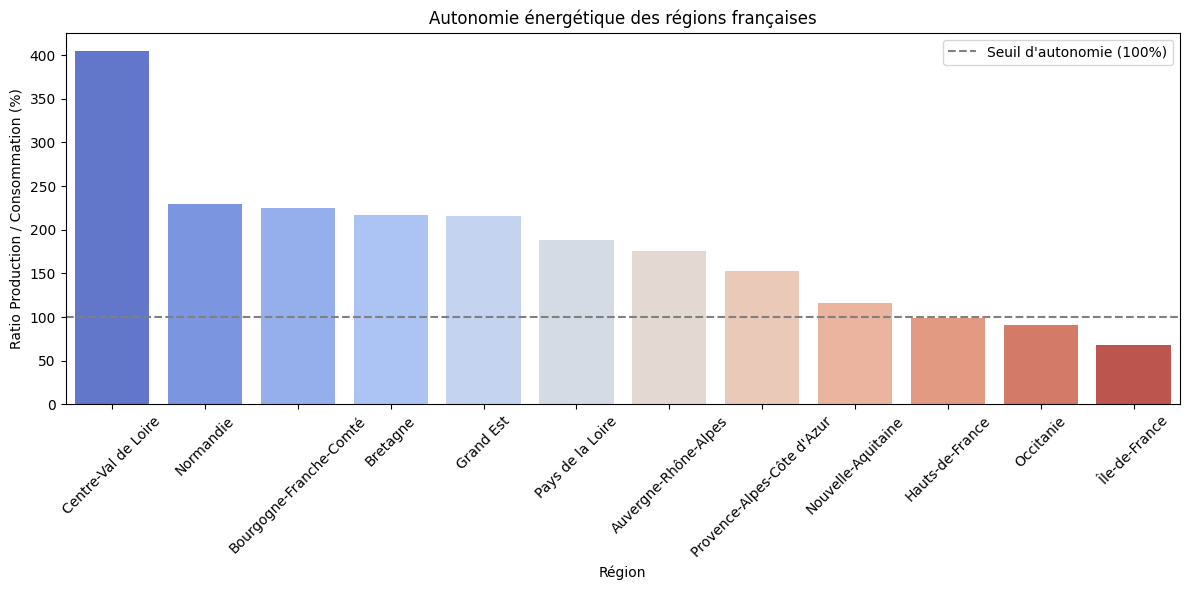

In [ ]:
# Ratio Production / Consommation par région
# Objectif métier : visualiser l’autonomie énergétique régionale,
# donc voir si une région produit suffisamment pour couvrir sa propre consommation.

# Calculer le ratio
region_stats["Ratio"] = region_stats["PROD"] / region_stats["Consommation (MW)"] * 100

# Trier du plus excédentaire au plus déficitaire
region_stats = region_stats.sort_values("Ratio", ascending=False)

# Tracer
plt.figure(figsize=(12, 6))
sns.barplot(data=region_stats, x="Région", y="Ratio", palette="coolwarm")
plt.axhline(100, color="gray", linestyle="--", label="Seuil d'autonomie (100%)")
plt.xticks(rotation=45)
plt.ylabel("Ratio Production / Consommation (%)")
plt.title("Autonomie énergétique des régions françaises")
plt.legend()
plt.tight_layout()
plt.show()

# Nous voyons que les régions productrices nettes sont par exemple le Centre-Val de Loire et la Normandie,
# dont la production dépasse largement leur consommation.
# À l’inverse, l’Île-de-France a un ratio très inférieur à 100 % :
# elle dépend des apports extérieurs d'électricité pour couvrir sa consommation.


In [ ]:
# METTRE ICI LE CODE D'ASMAE POUR LE GRAPHIQUE : Impact de la population sur la consommation et la production d'Energie

In [ ]:
# Calculer la moyenne de conso/hab par région
mean_cons = df_An.groupby('Région')['Conso par Hab (Wh)'].mean()
# Trier par ordre décroissant
order = mean_cons.sort_values(ascending=False).index.tolist()

mean_cons = pd.DataFrame(mean_cons)

# histogramme de la conso moyenne/hab par région
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_cons, x='Région', y='Conso par Hab (Wh)',
            order = order,palette='coolwarm_r')
plt.axhline(df_An['Conso par Hab (Wh)'].mean(), color="gray", linestyle="--", label="Moyenne France")
plt.xticks(rotation=70)
plt.title("Consommation moyenne/habitant par région")
plt.legend()
plt.tight_layout()
plt.show();


KeyError: 'Région'

In [ ]:
# Calcul de la moyenne de consommation par habitant par région (sur toute la période)
mean_cons = df.groupby('Région')['Conso par Hab (Wh)'].mean()

# Trier par ordre décroissant
order = mean_cons.sort_values(ascending=False).index.tolist()
mean_cons = pd.DataFrame(mean_cons)

# Histogramme
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_cons, x='Région', y='Conso par Hab (Wh)', order=order, palette='coolwarm_r')

# Ligne de la moyenne France (toute période)
plt.axhline(df['Conso par Hab (Wh)'].mean(), color='gray', linestyle='--', label="Moyenne France")

# Mise en forme
plt.xticks(rotation=70)
plt.title("Consommation moyenne/habitant par région (2013–2022)")
plt.ylabel("Wh/habitant (moyenne sur la période)")
plt.legend()
plt.tight_layout()
plt.show()


KeyError: 'Column not found: Conso par Hab (Wh)'

In [ ]:
print(df.columns.tolist())


['Code INSEE région', 'Région', 'Date', 'Consommation (MW)', 'Thermique (MW)', 'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)', 'Pompage (MW)', 'Bioénergies (MW)', 'Ech. physiques (MW)', 'TCO Thermique (%)', 'TCH Thermique (%)', 'TCO Nucléaire (%)', 'TCH Nucléaire (%)', 'TCO Eolien (%)', 'TCH Eolien (%)', 'TCO Solaire (%)', 'TCH Solaire (%)', 'TCO Hydraulique (%)', 'TCH Hydraulique (%)', 'TCO Bioénergies (%)', 'TCH Bioénergies (%)', 'JourSemaine', 'PROD', 'CONSO', 'Année_mois', 'Année', 'Mois', 'Hour']


# Analyse mutivariée

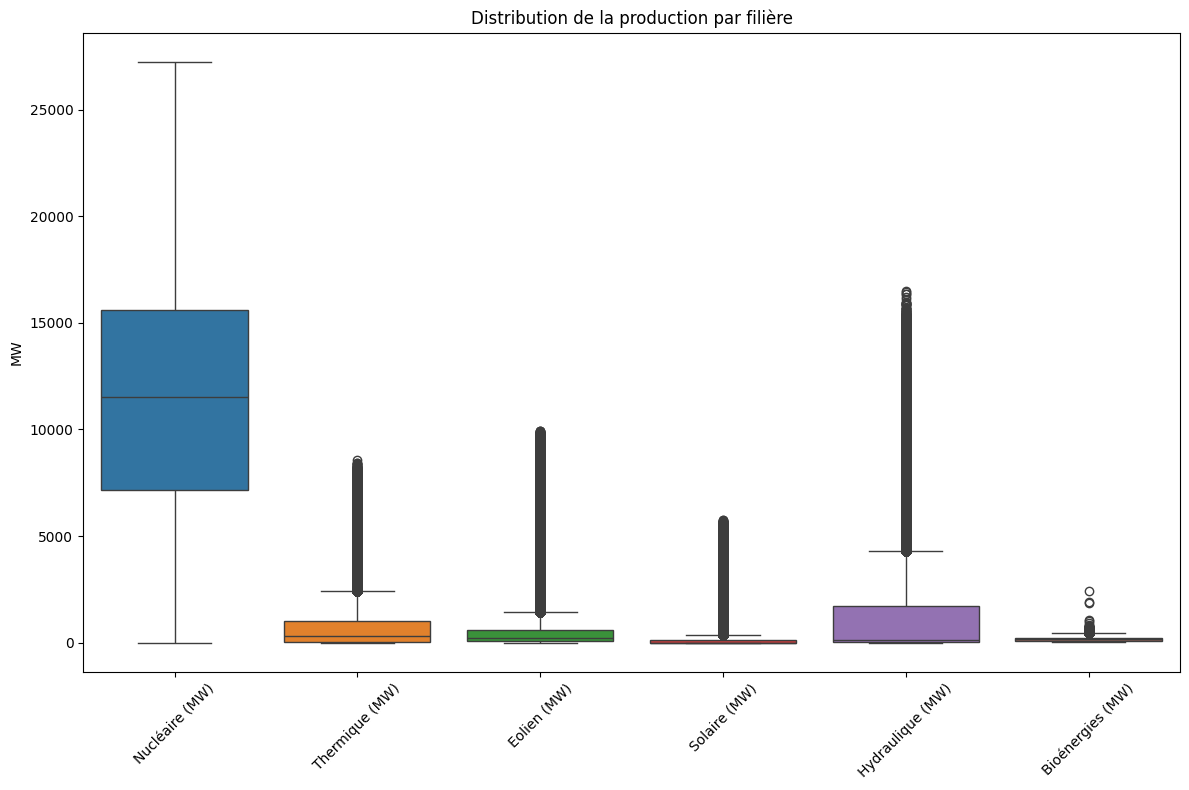

In [ ]:
#Box plot des productions par filières
plt.figure(figsize=(12, 8))
sns.boxplot(data=col_production)
plt.title('Distribution de la production par filière')
plt.ylabel('MW')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

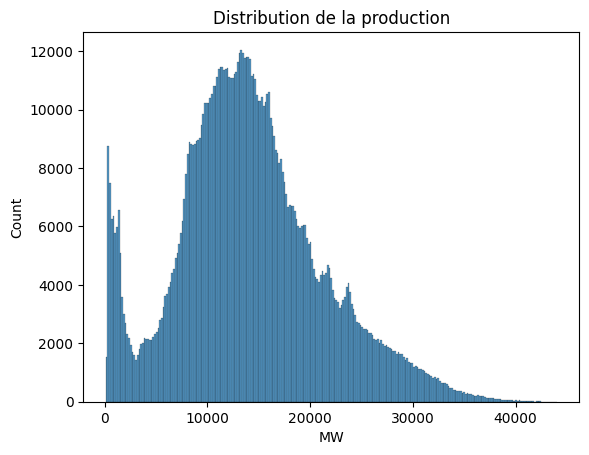

In [ ]:
#distribution de la production
plt.title('Distribution de la production')
plt.xlabel('MW')
sns.histplot(df.PROD);

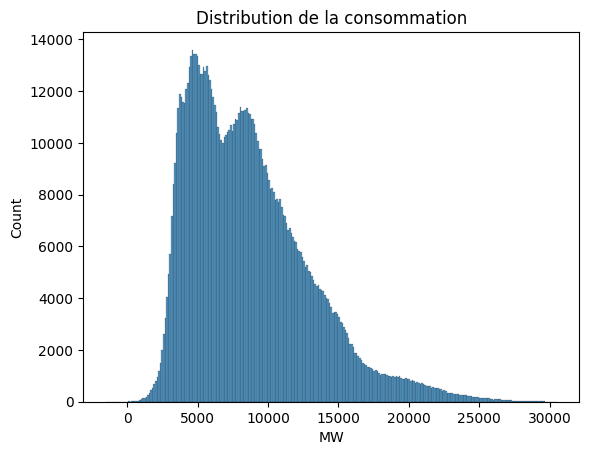

In [ ]:
#distribution de la consommation
plt.title('Distribution de la consommation')
plt.xlabel('MW')
sns.histplot(df.CONSO);

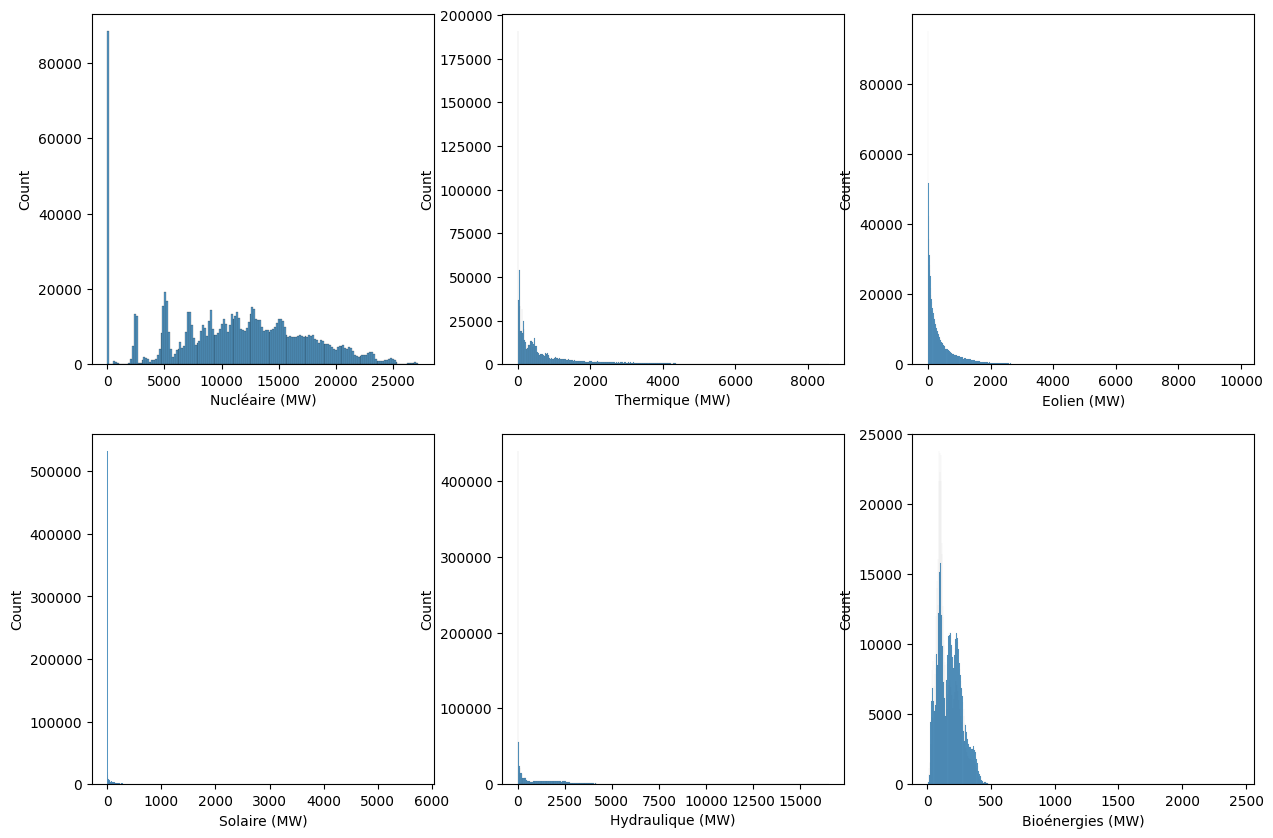

In [ ]:
#distribution des colonnes de production d'énergie par filières
plt.figure( figsize= (15,10) )
for i,j in enumerate(col_production):
    plt.subplot(2,3,i+1)
    sns.histplot(df[j])


# Analyse des variables catégorielles

In [ ]:
# liste des valeurs et mode
for col in col_cat:
    if df[col].dtype == 'object':
        print('variable :',col)
        print('valeurs :',df[col].unique())
        print('mode :')
        display(df[col].mode())
        print('...')

# toutes les valeurs apparaissent dans le mode,
# donc elles apparaissent toutes autant les unes que les autres dans les colonnes code insee region et region

variable : Code INSEE région
valeurs : ['11' '24' '27' '28' '32' '44' '52' '53' '75' '76' '84' '93']
mode :


0     11
1     24
2     27
3     28
4     32
5     44
6     52
7     53
8     75
9     76
10    84
11    93
Name: Code INSEE région, dtype: object

...
variable : Région
valeurs : ['Île-de-France' 'Centre-Val de Loire' 'Bourgogne-Franche-Comté'
 'Normandie' 'Hauts-de-France' 'Grand Est' 'Pays de la Loire' 'Bretagne'
 'Nouvelle-Aquitaine' 'Occitanie' 'Auvergne-Rhône-Alpes'
 "Provence-Alpes-Côte d'Azur"]
mode :


0           Auvergne-Rhône-Alpes
1        Bourgogne-Franche-Comté
2                       Bretagne
3            Centre-Val de Loire
4                      Grand Est
5                Hauts-de-France
6                      Normandie
7             Nouvelle-Aquitaine
8                      Occitanie
9               Pays de la Loire
10    Provence-Alpes-Côte d'Azur
11                 Île-de-France
Name: Région, dtype: object

...


# Variations dans le temps

Text(46.793489583333326, 0.5, 'Consommation (MW)')

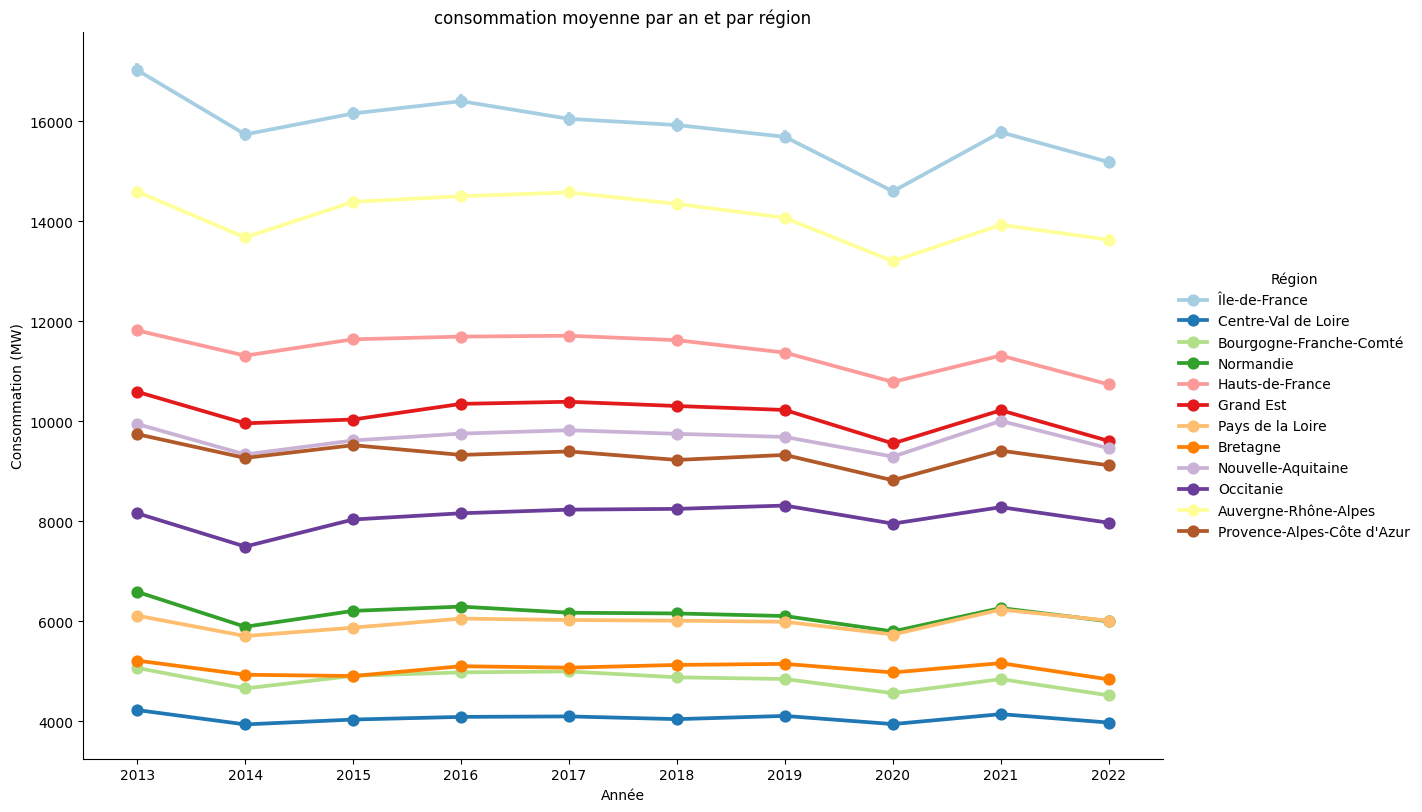

In [ ]:
#consommation moyenne par an et par région
sns.catplot(x=df.Année, y='CONSO',data=df, kind='point', hue='Région',
            height=8, aspect=1.5, palette="Paired")
plt.title('consommation moyenne par an et par région')
plt.ylabel('Consommation (MW)')
# attention l'année 2023 n'est pas complète
# c'est la region IDF qui consomme le plus, suivi de auvergne-rhone-alpes
# => cela peut s'expliquer par fait qu'elles sont les + peuplées en FR
# et haut de france
# => notamment lié au fait qu'elle abrite des industries lourdes énergivores et sa densité de population

Text(46.76829427083332, 0.5, 'Production (MW)')

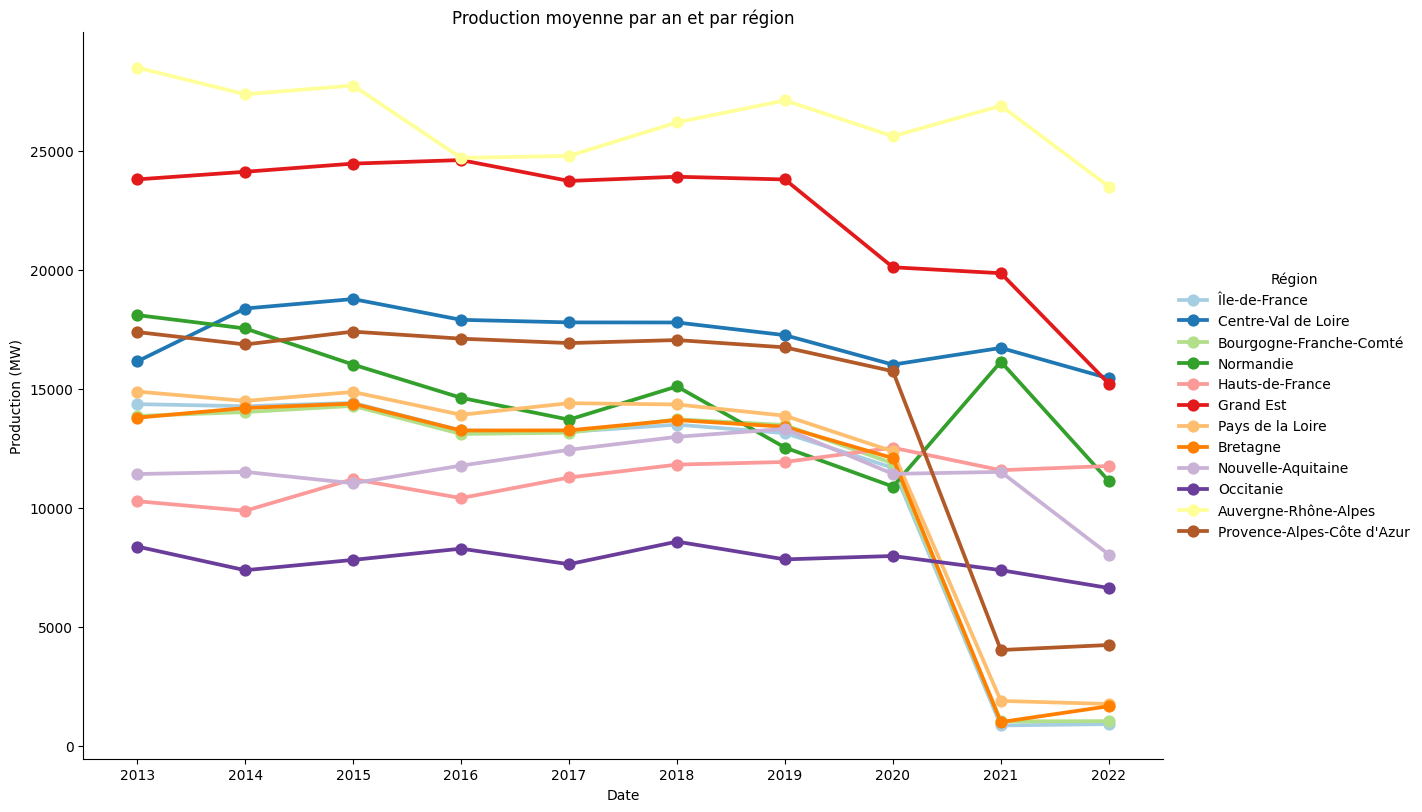

In [ ]:
#production moyenne par an et par région
sns.catplot(x=df.Date.dt.year, y='PROD',data=df, kind='point', hue='Région',
            height=8, aspect=1.5, palette="Paired")
plt.title('Production moyenne par an et par région')
plt.ylabel('Production (MW)')

# la production chute massivement en 2021 ce qui est bizarre

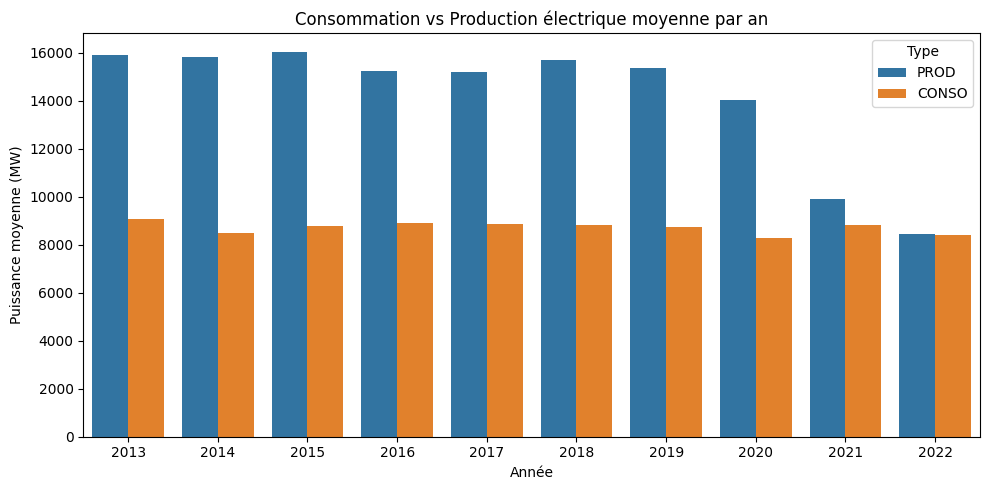

In [ ]:
# Comparaison annuelle : consommation vs production
# Objectif métier : comparer l’évolution annuelle de la consommation (CONSO)
# et de la production (PROD) pour identifier les années de surplus, de déficit, ou de stabilité énergétique.

# Extraire l'année
df["Année"] = df["Date"].dt.year

# Regrouper par année : moyenne de production et consommation
annees = df.groupby("Année")[["PROD", "CONSO"]].mean().reset_index()

# Restructurer pour affichage comparé
annees_melt = annees.melt(id_vars="Année", value_vars=["PROD", "CONSO"],
                          var_name="Type", value_name="MW")

# Tracé
plt.figure(figsize=(10, 5))
sns.barplot(data=annees_melt, x="Année", y="MW", hue="Type")
plt.title("Consommation vs Production électrique moyenne par an")
plt.ylabel("Puissance moyenne (MW)")
plt.xlabel("Année")
plt.tight_layout()
plt.show()

# On voit que la production dépasse légèrement la consommation sur toute la période.
# ça reflète la stratégie française de surcapacité, avec des exportations régulières d’électricité.

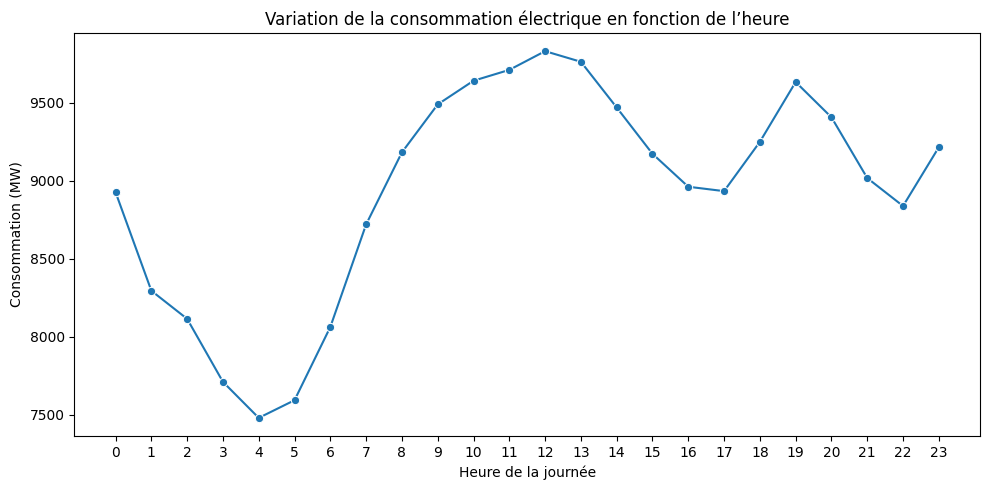

In [ ]:
# Variation journalière de la consommation (par heure)
# Objectif métier : identifier les moments de la journée où la consommation est la plus forte : matinée, soirée, nuit, etc.
# C’est important pour ajuster la production en temps réel, ça permet de prédire la consommation et donc de prévoir la production en fonction de ça.

# Conversion de la colonne Hour au bon format
if "Hour" in df.columns and df["Hour"].dtype == object:
    df["Hour"] = pd.to_datetime(df["Hour"], format="%H:%M:%S", errors="coerce").dt.hour
elif "Hour" not in df.columns:
    df["Hour"] = pd.to_datetime(df["Date"], errors="coerce").dt.hour

# Moyenne par heure
conso_horaire = df.groupby("Hour")["Consommation (MW)"].mean().reset_index()

# Tracé
plt.figure(figsize=(10, 5))
sns.lineplot(data=conso_horaire, x="Hour", y="Consommation (MW)", marker="o")
plt.xticks(range(0, 24))
plt.title("Variation de la consommation électrique en fonction de l’heure")
plt.xlabel("Heure de la journée")
plt.tight_layout()
plt.show()

# La consommation augmente fortement le matin (entre 6h et 9h), se stabilise en journée, puis atteint un second pic en début de soirée (entre 18h et 21h).
# Il y a un creux pendant la nuit.
# Ca correspond au rythme de vie des foyers et des entreprises.

In [ ]:
# Évolution de la consommation électrique dans le temps (par mois)
# Objectif métier : identifier les tendances saisonnières et les changements dans la consommation.

plt.figure(figsize=(14, 5))
sns.lineplot(data=conso_mensuelle, x="Année_mois", y="Consommation (MW)", marker="o")
plt.xticks(ticks=range(0, len(conso_mensuelle), 6),
           labels=conso_mensuelle["Année_mois"].iloc[::6], rotation=45)
plt.title("Évolution mensuelle de la consommation électrique en France")
plt.tight_layout()
plt.show()

# On observe une saisonnalité dans la consommation électrique, avec des pics chaque hiver (en janvier) et des creux en été (en août).
# C'est sûrement à cause du chauffage électrique en hiver.
# La baisse exceptionnelle en 2020 correspond probablement à la crise du COVID-19.


NameError: name 'conso_mensuelle' is not defined

<Figure size 1400x500 with 0 Axes>

In [ ]:
# Variation de la consommation selon le jour de la semaine.
# Objectif métier : identifier si la consommation d’électricité varie selon les jours, pour ainsi mieux planifier la production.

# Dictionnaire pour renommer les jours
jours = {
    0: "Lundi", 1: "Mardi", 2: "Mercredi", 3: "Jeudi",
    4: "Vendredi", 5: "Samedi", 6: "Dimanche"
}
df["JourNom"] = df["JourSemaine"].map(jours)

# Tracé du boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="JourNom", y="Consommation (MW)", order=list(jours.values()))
plt.title("Consommation électrique selon le jour de la semaine")
plt.xlabel("Jour")
plt.ylabel("Consommation (MW)")
plt.tight_layout()
plt.show()

# Le graphique montre que la consommation électrique moyenne est plus élevée du lundi au vendredi.
# Le week-end, la consommation est moins importante. Cela est lié au ralentissement de l’activité économique pendant le week-end parce que les entreprises sont fermées.
# La dispersion des valeurs (moustaches longues et nombreux outliers) indique que des pics de consommation peuvent survenir certains jours, mais il y a quand même moins de consommation énergétique le week-end.
# Ce profil de consommation hebdomadaire correspond donc à un pays où les gens travaillent la semaine mais pas le week-end, ça doit être pris en compte dans la planification de la production d'énergie.



NameError: name 'df' is not defined

# Analyse par région

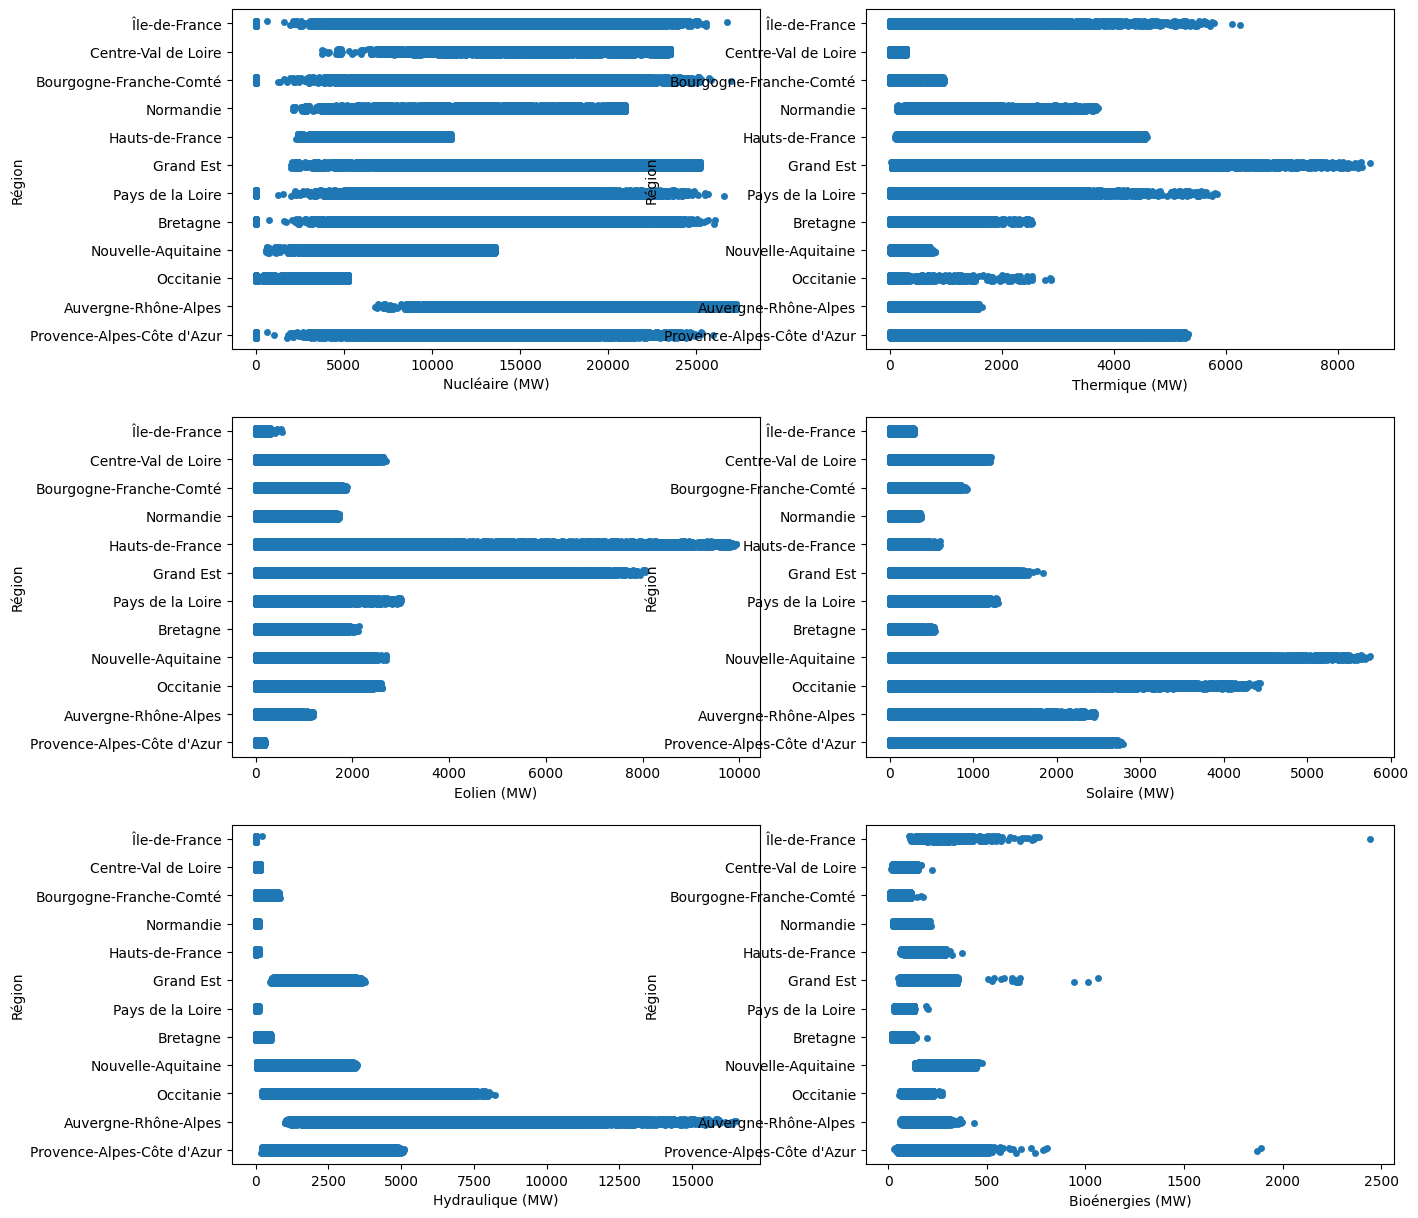

In [ ]:
y='Région'

plt.figure( figsize= (15,15) )
for i,j in enumerate(col_production):
    plt.subplot(3,2,i+1)
    sns.stripplot(data = df, x = j, y = y)


## Evolution de la production par région et par an pour chaque filière  

<Figure size 1200x1200 with 0 Axes>

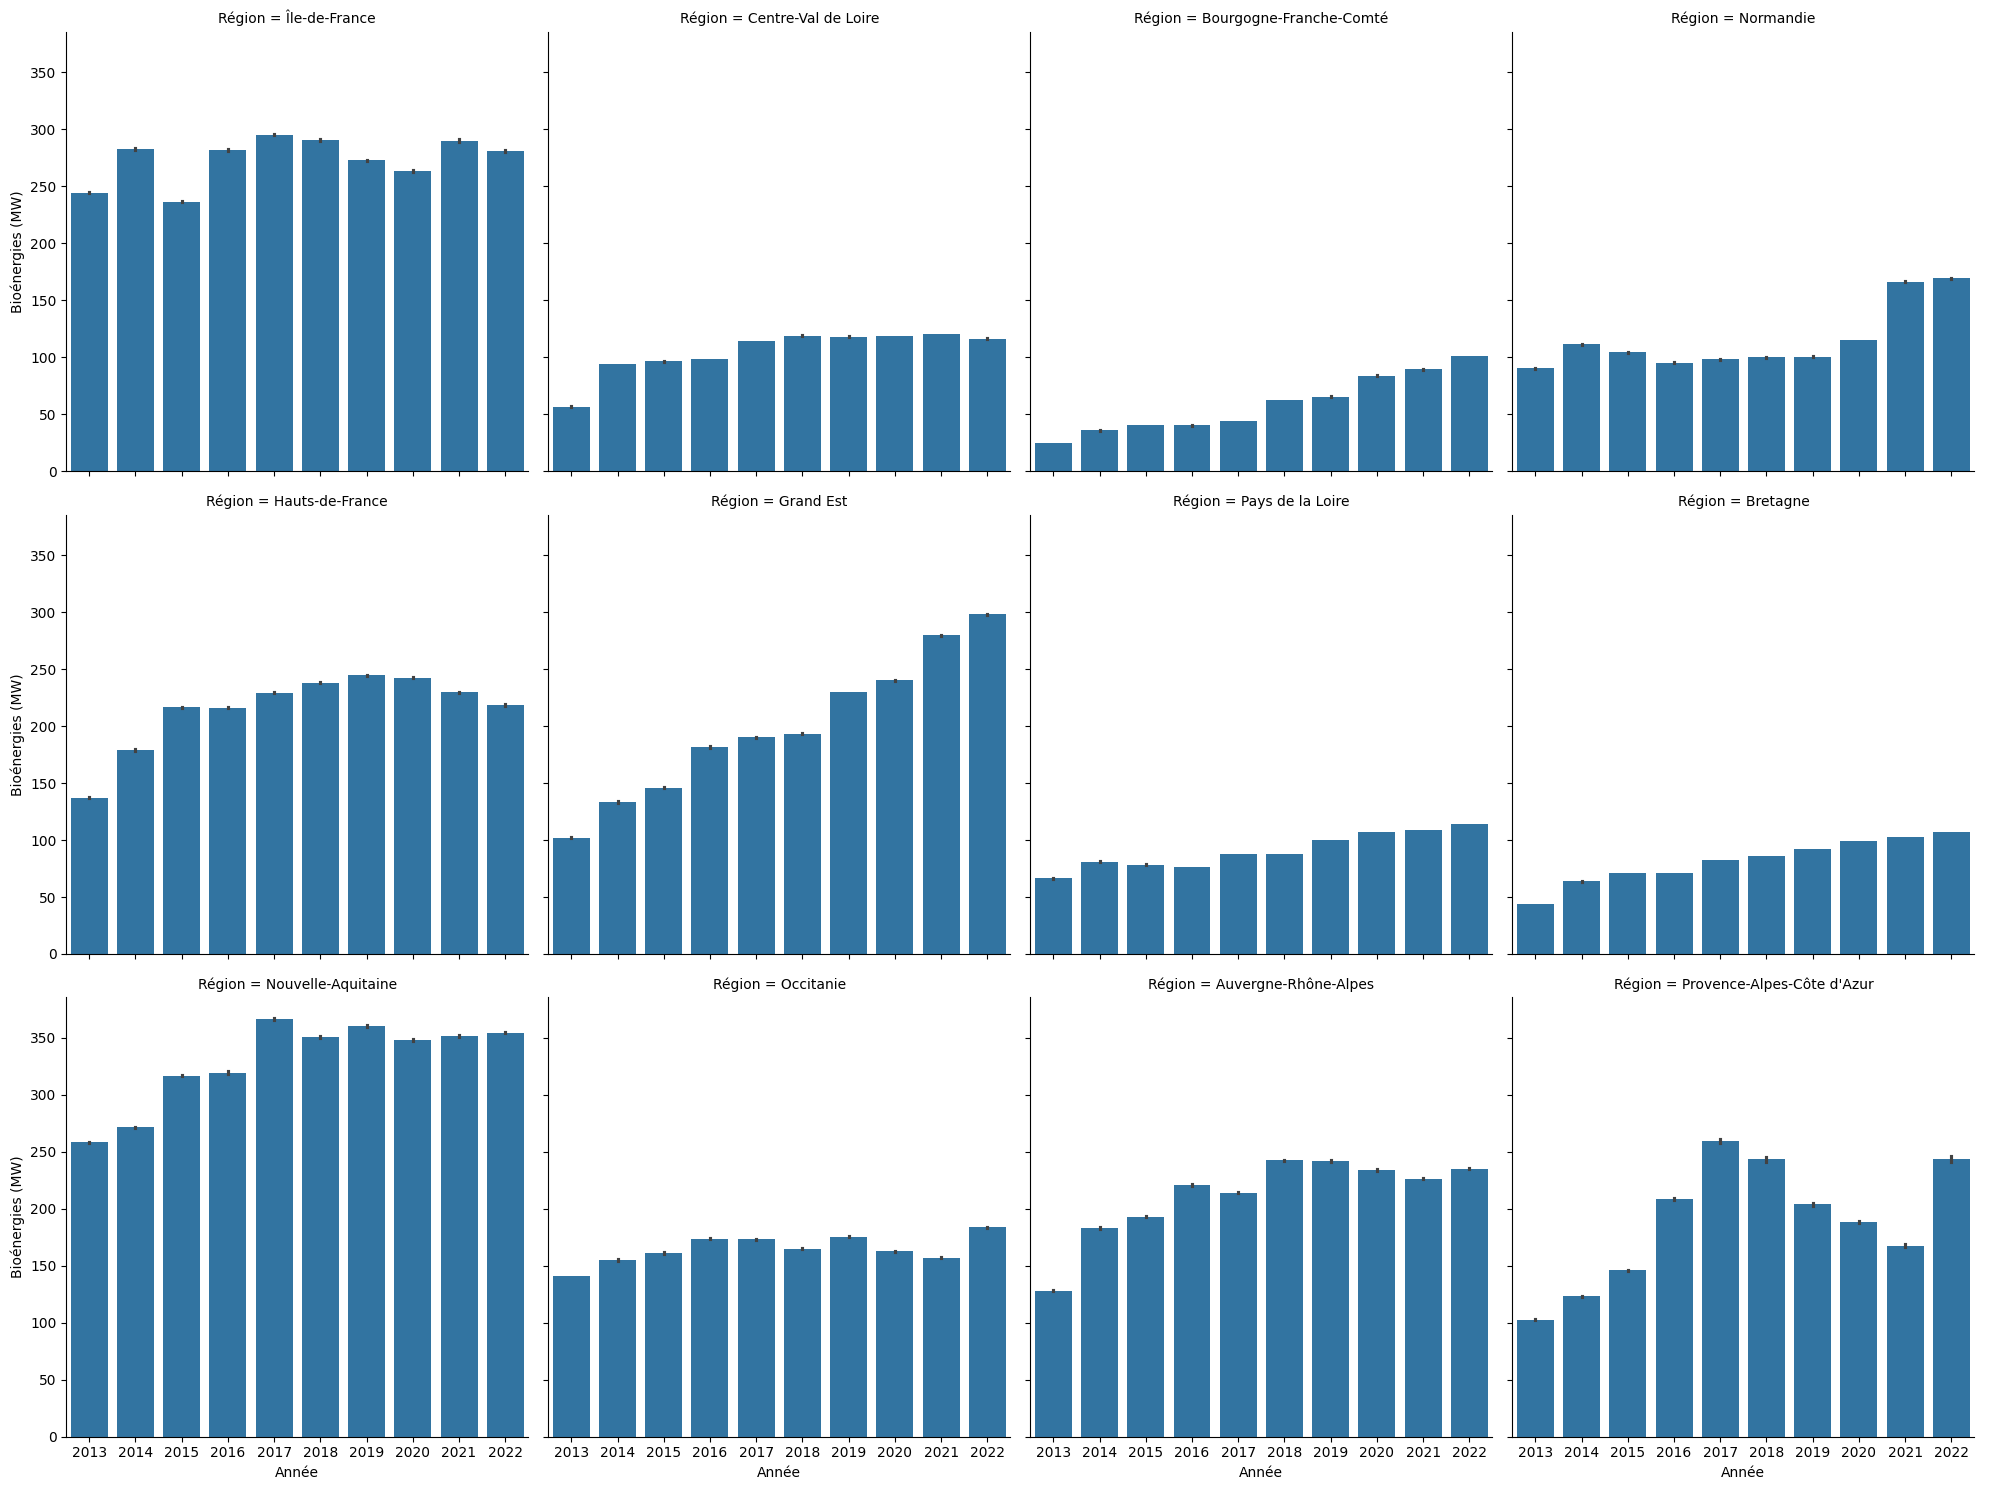

In [ ]:
plt.figure(figsize=(12, 12))
sns.catplot(
    x=df.Date.dt.year, y='Bioénergies (MW)',data=df, kind='bar',col='Région',col_wrap=4
    ).set_xlabels('Année')
plt.show()

<Figure size 1200x1200 with 0 Axes>

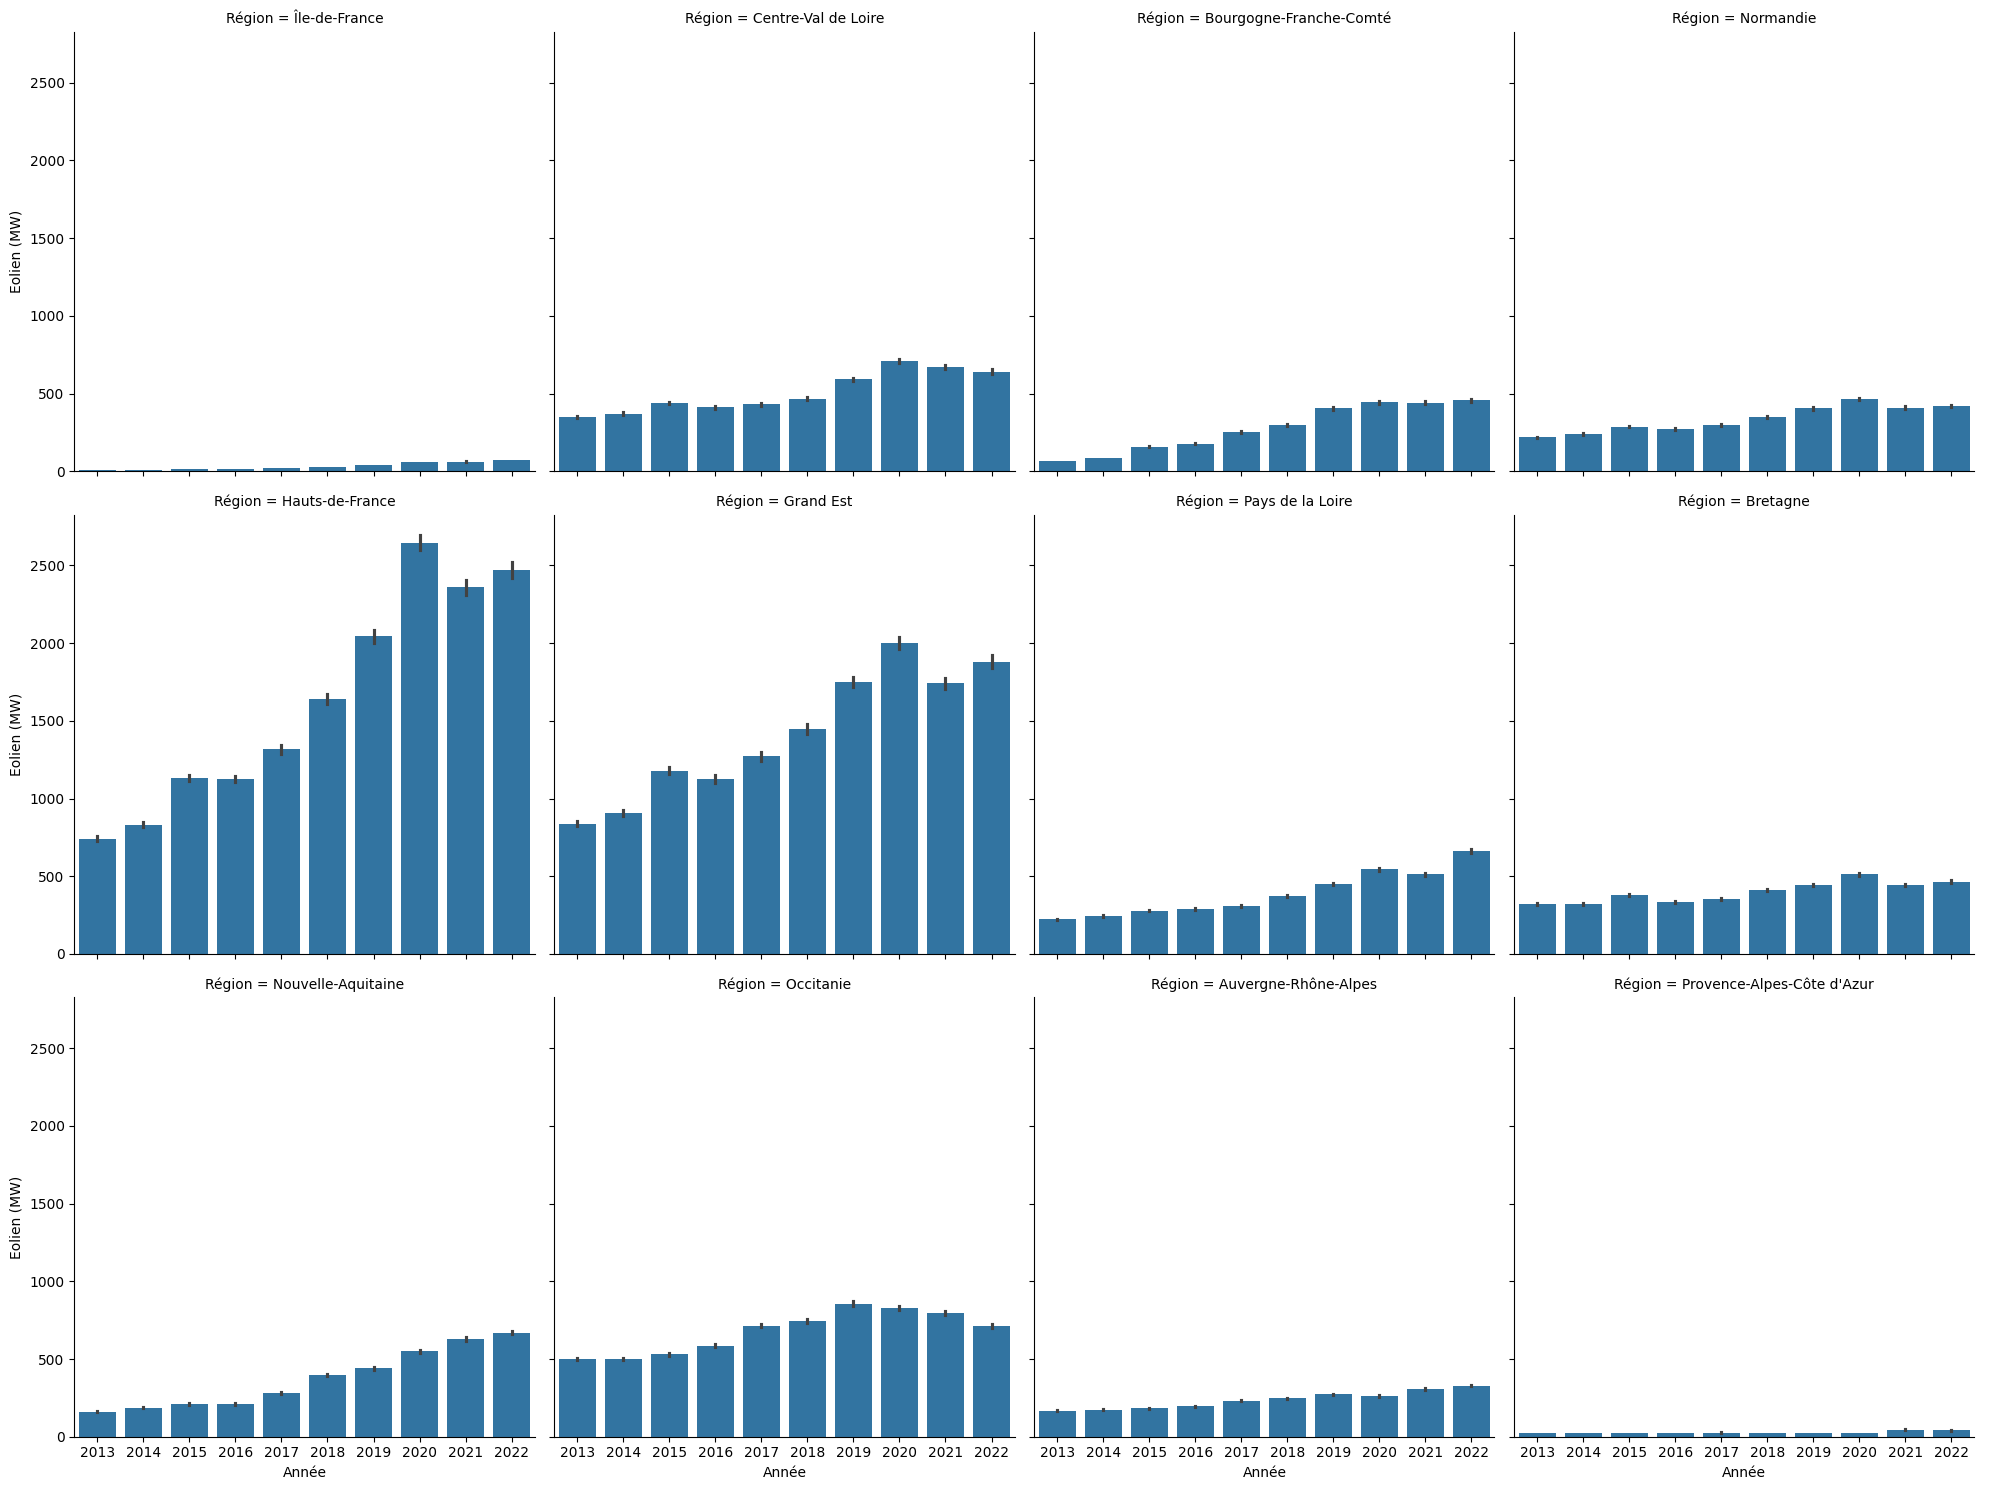

In [ ]:
plt.figure(figsize=(12, 12))
sns.catplot(
    x=df.Date.dt.year, y='Eolien (MW)',data=df, kind='bar',col='Région',col_wrap=4
    ).set_xlabels('Année')
plt.show()

<Figure size 1200x1200 with 0 Axes>

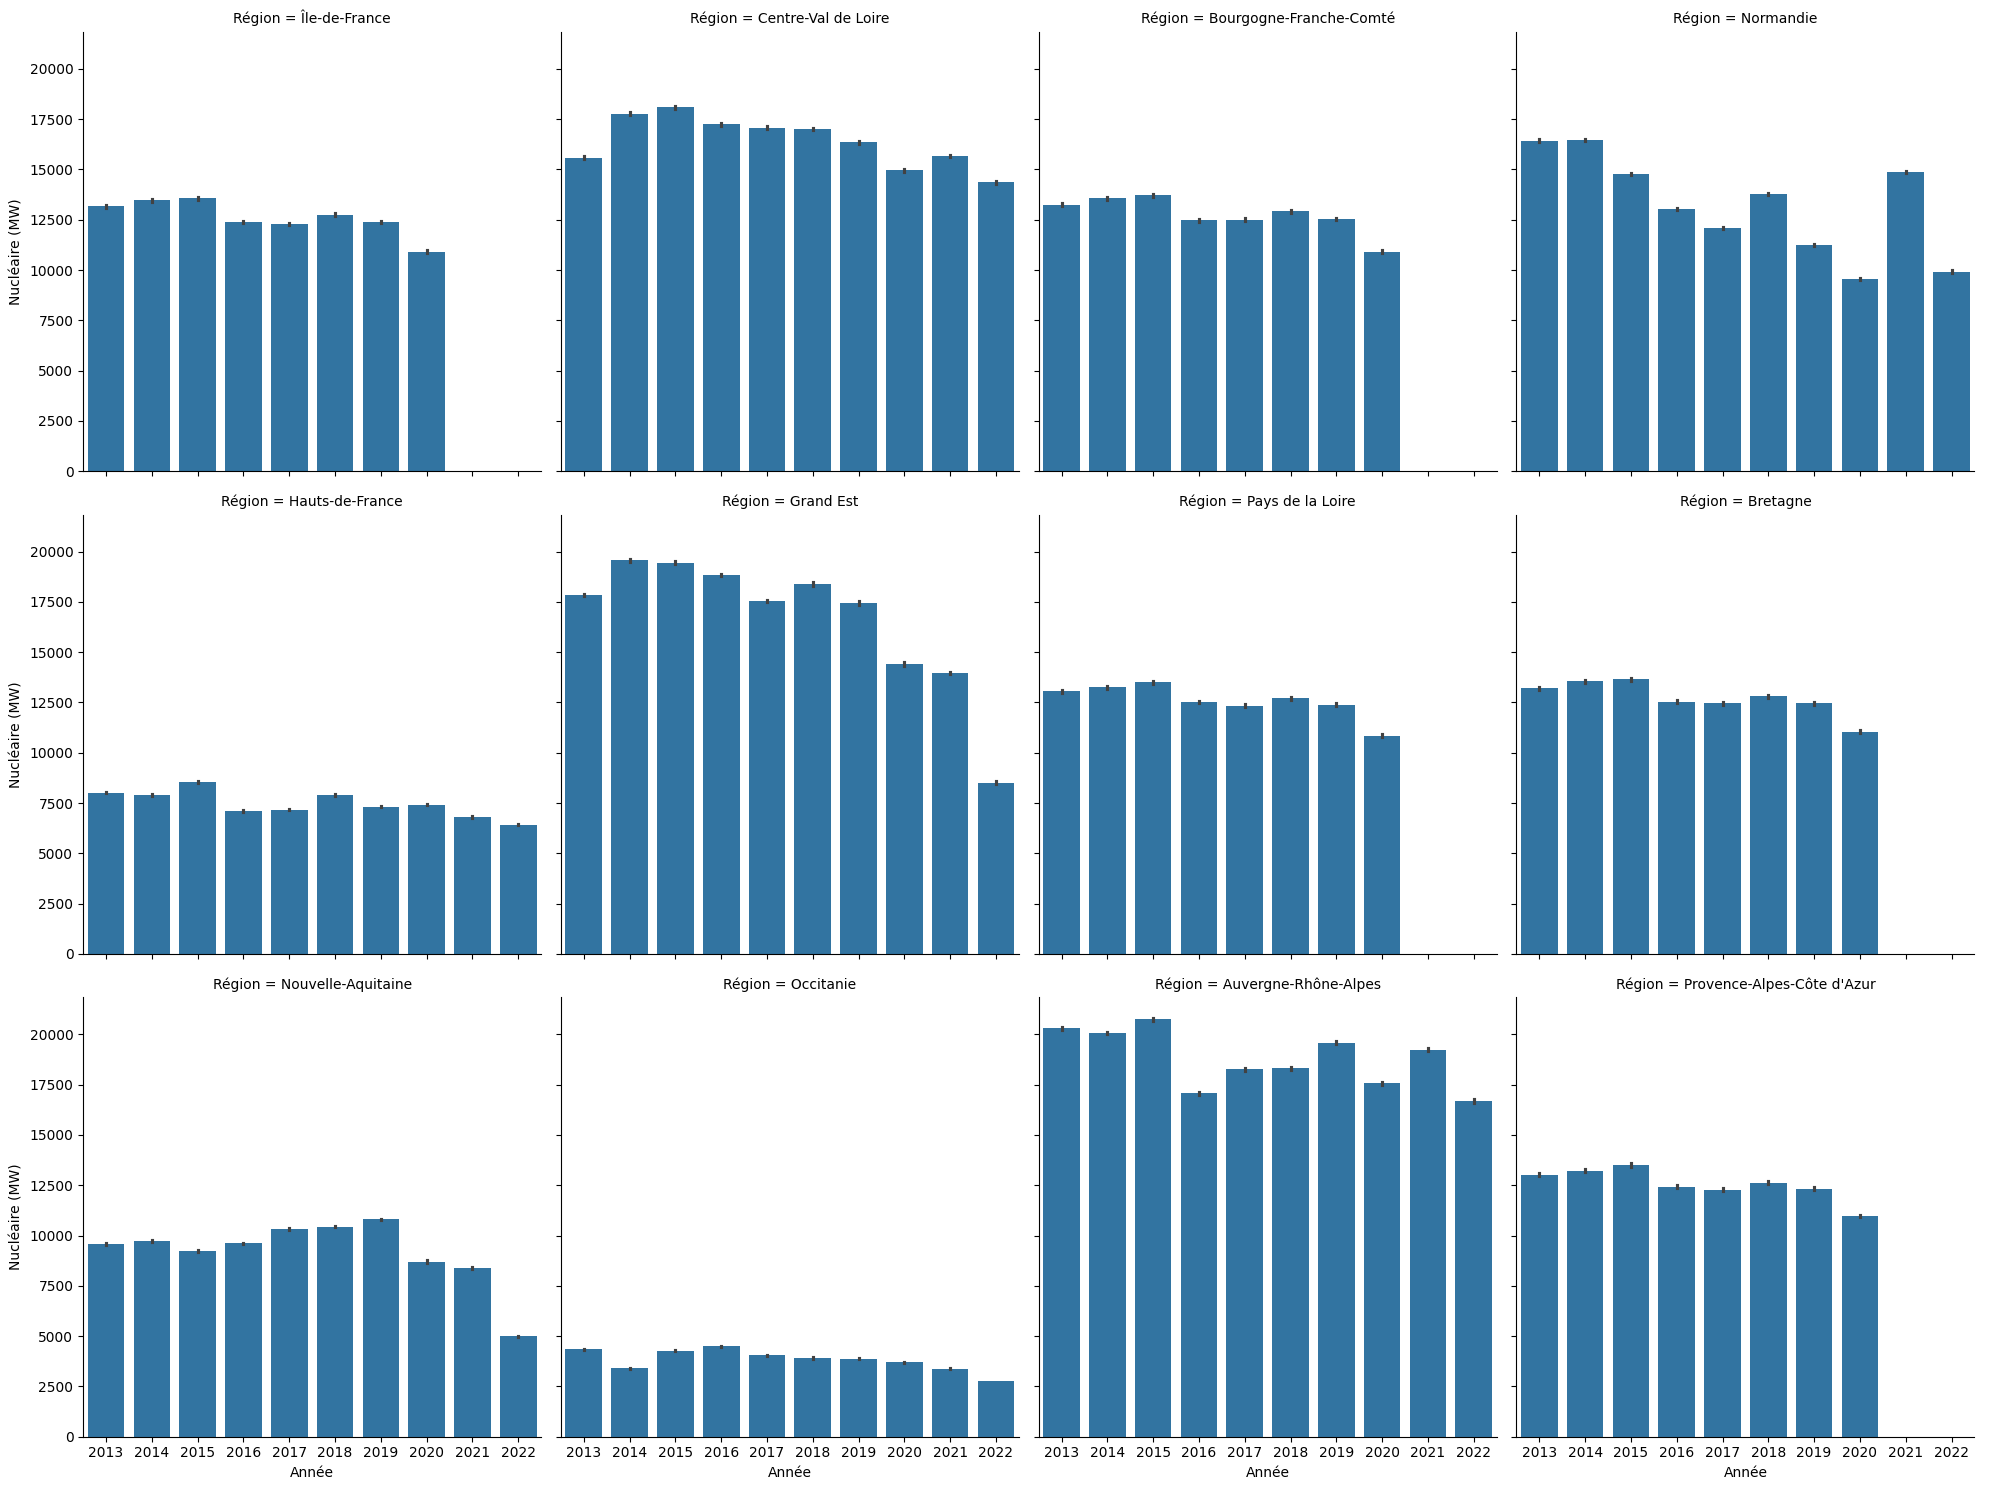

In [ ]:
plt.figure(figsize=(12, 12))
sns.catplot(
    x=df.Date.dt.year, y='Nucléaire (MW)',data=df, kind='bar',col='Région',col_wrap=4
    ).set_xlabels('Année')
plt.show()

<Figure size 1200x1200 with 0 Axes>

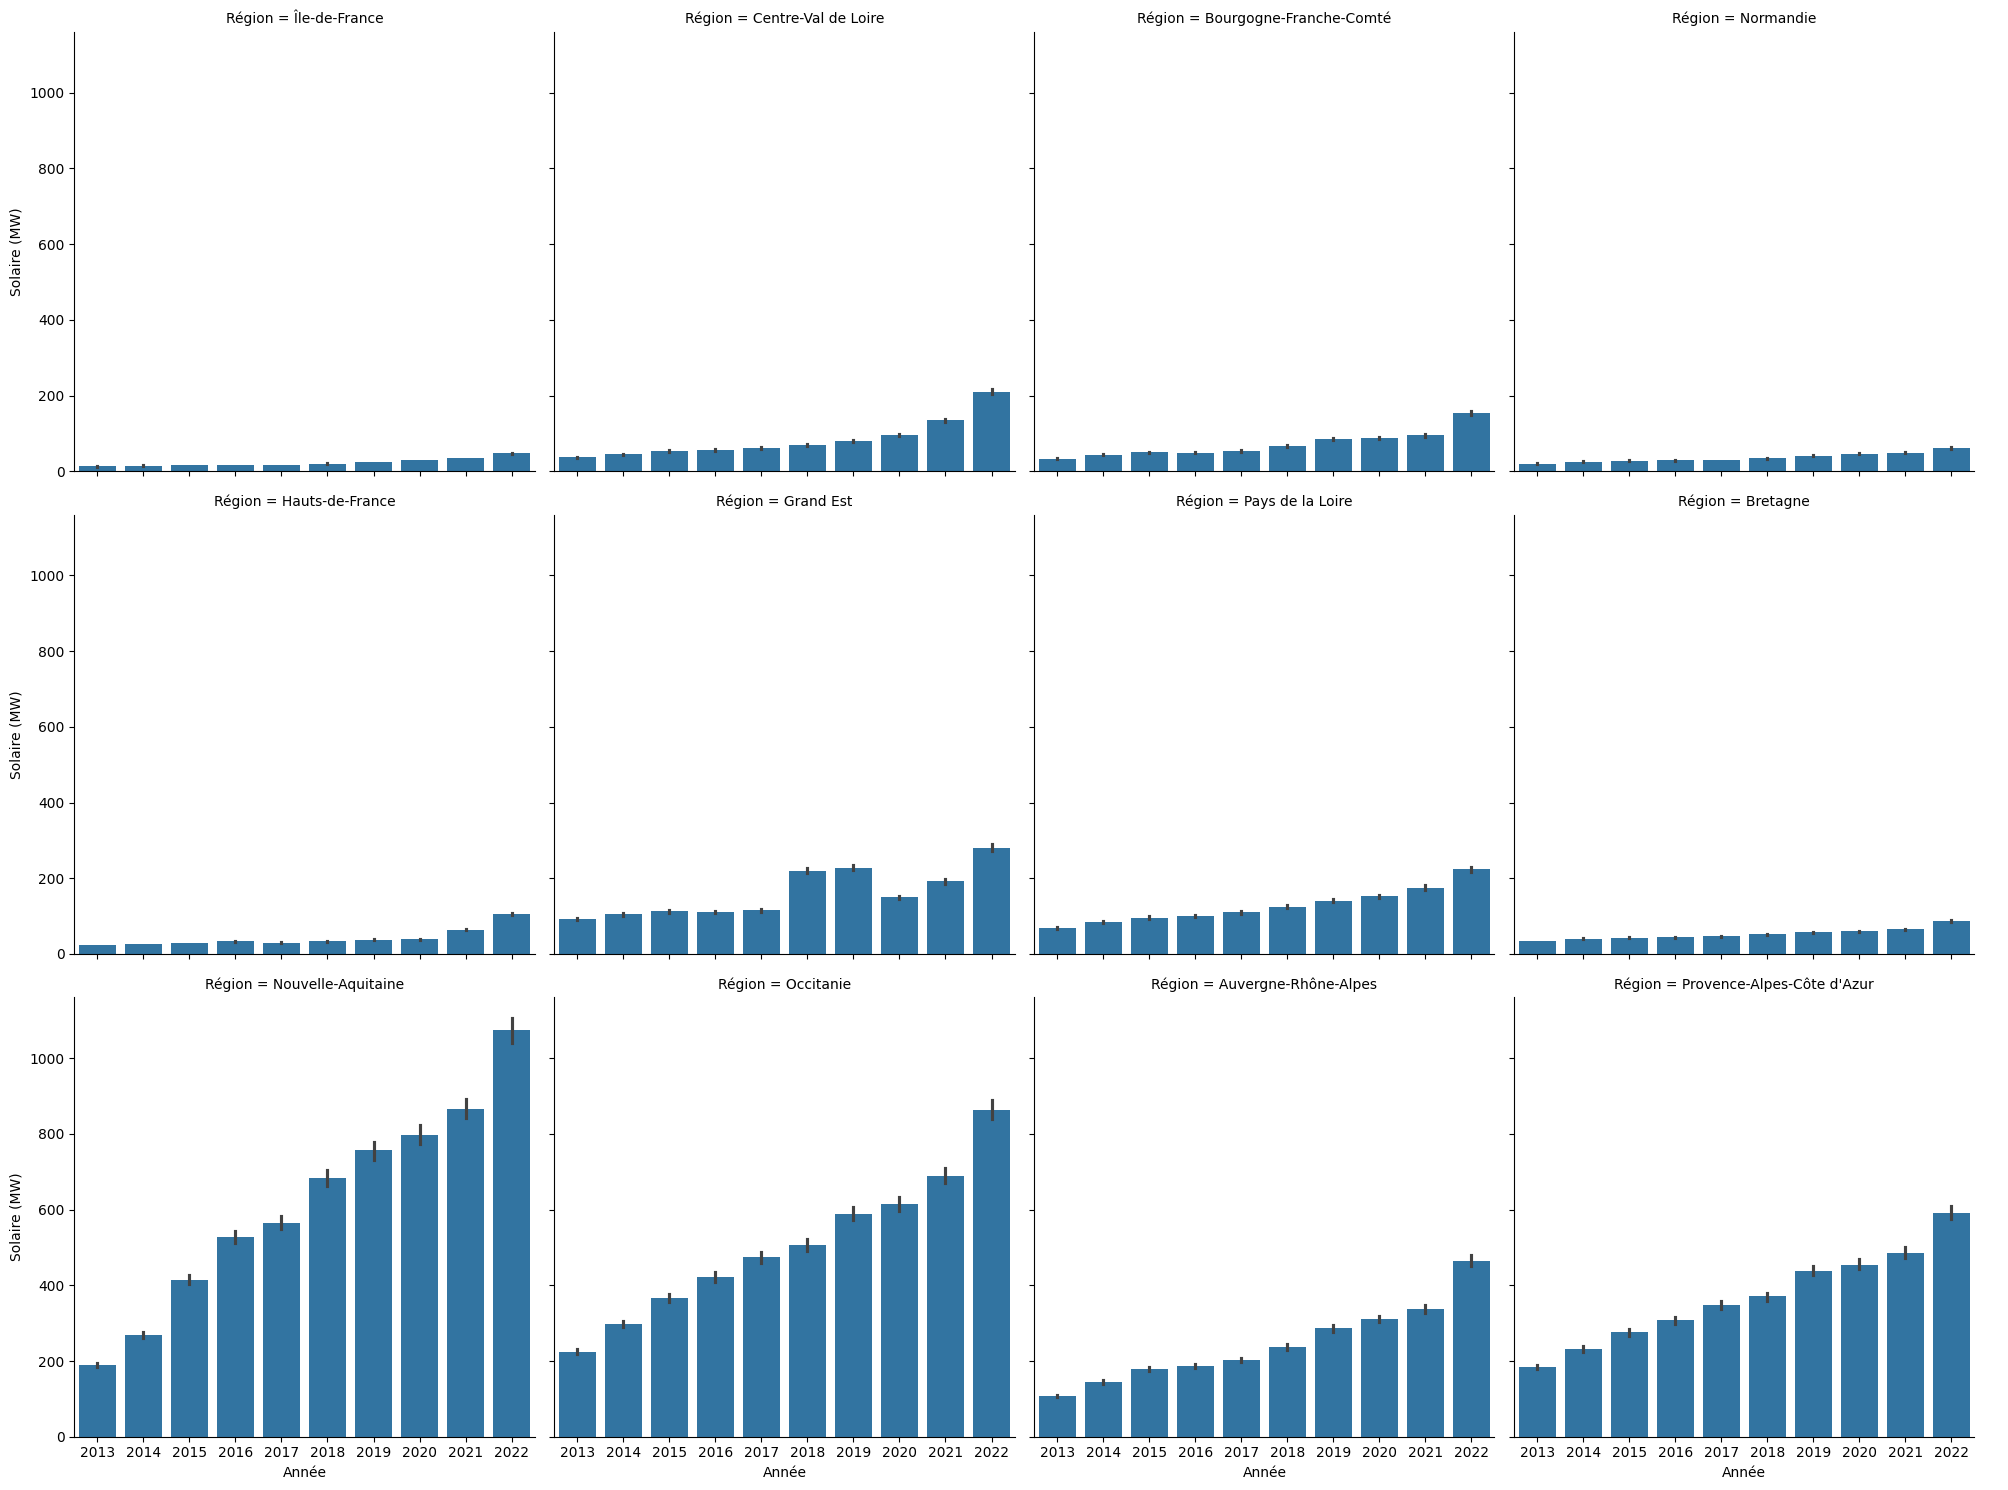

In [ ]:
plt.figure(figsize=(12, 12))
sns.catplot(
    x=df.Date.dt.year, y='Solaire (MW)',data=df, kind='bar',col='Région',col_wrap=4
    ).set_xlabels('Année')
plt.show()

<Figure size 1200x1200 with 0 Axes>

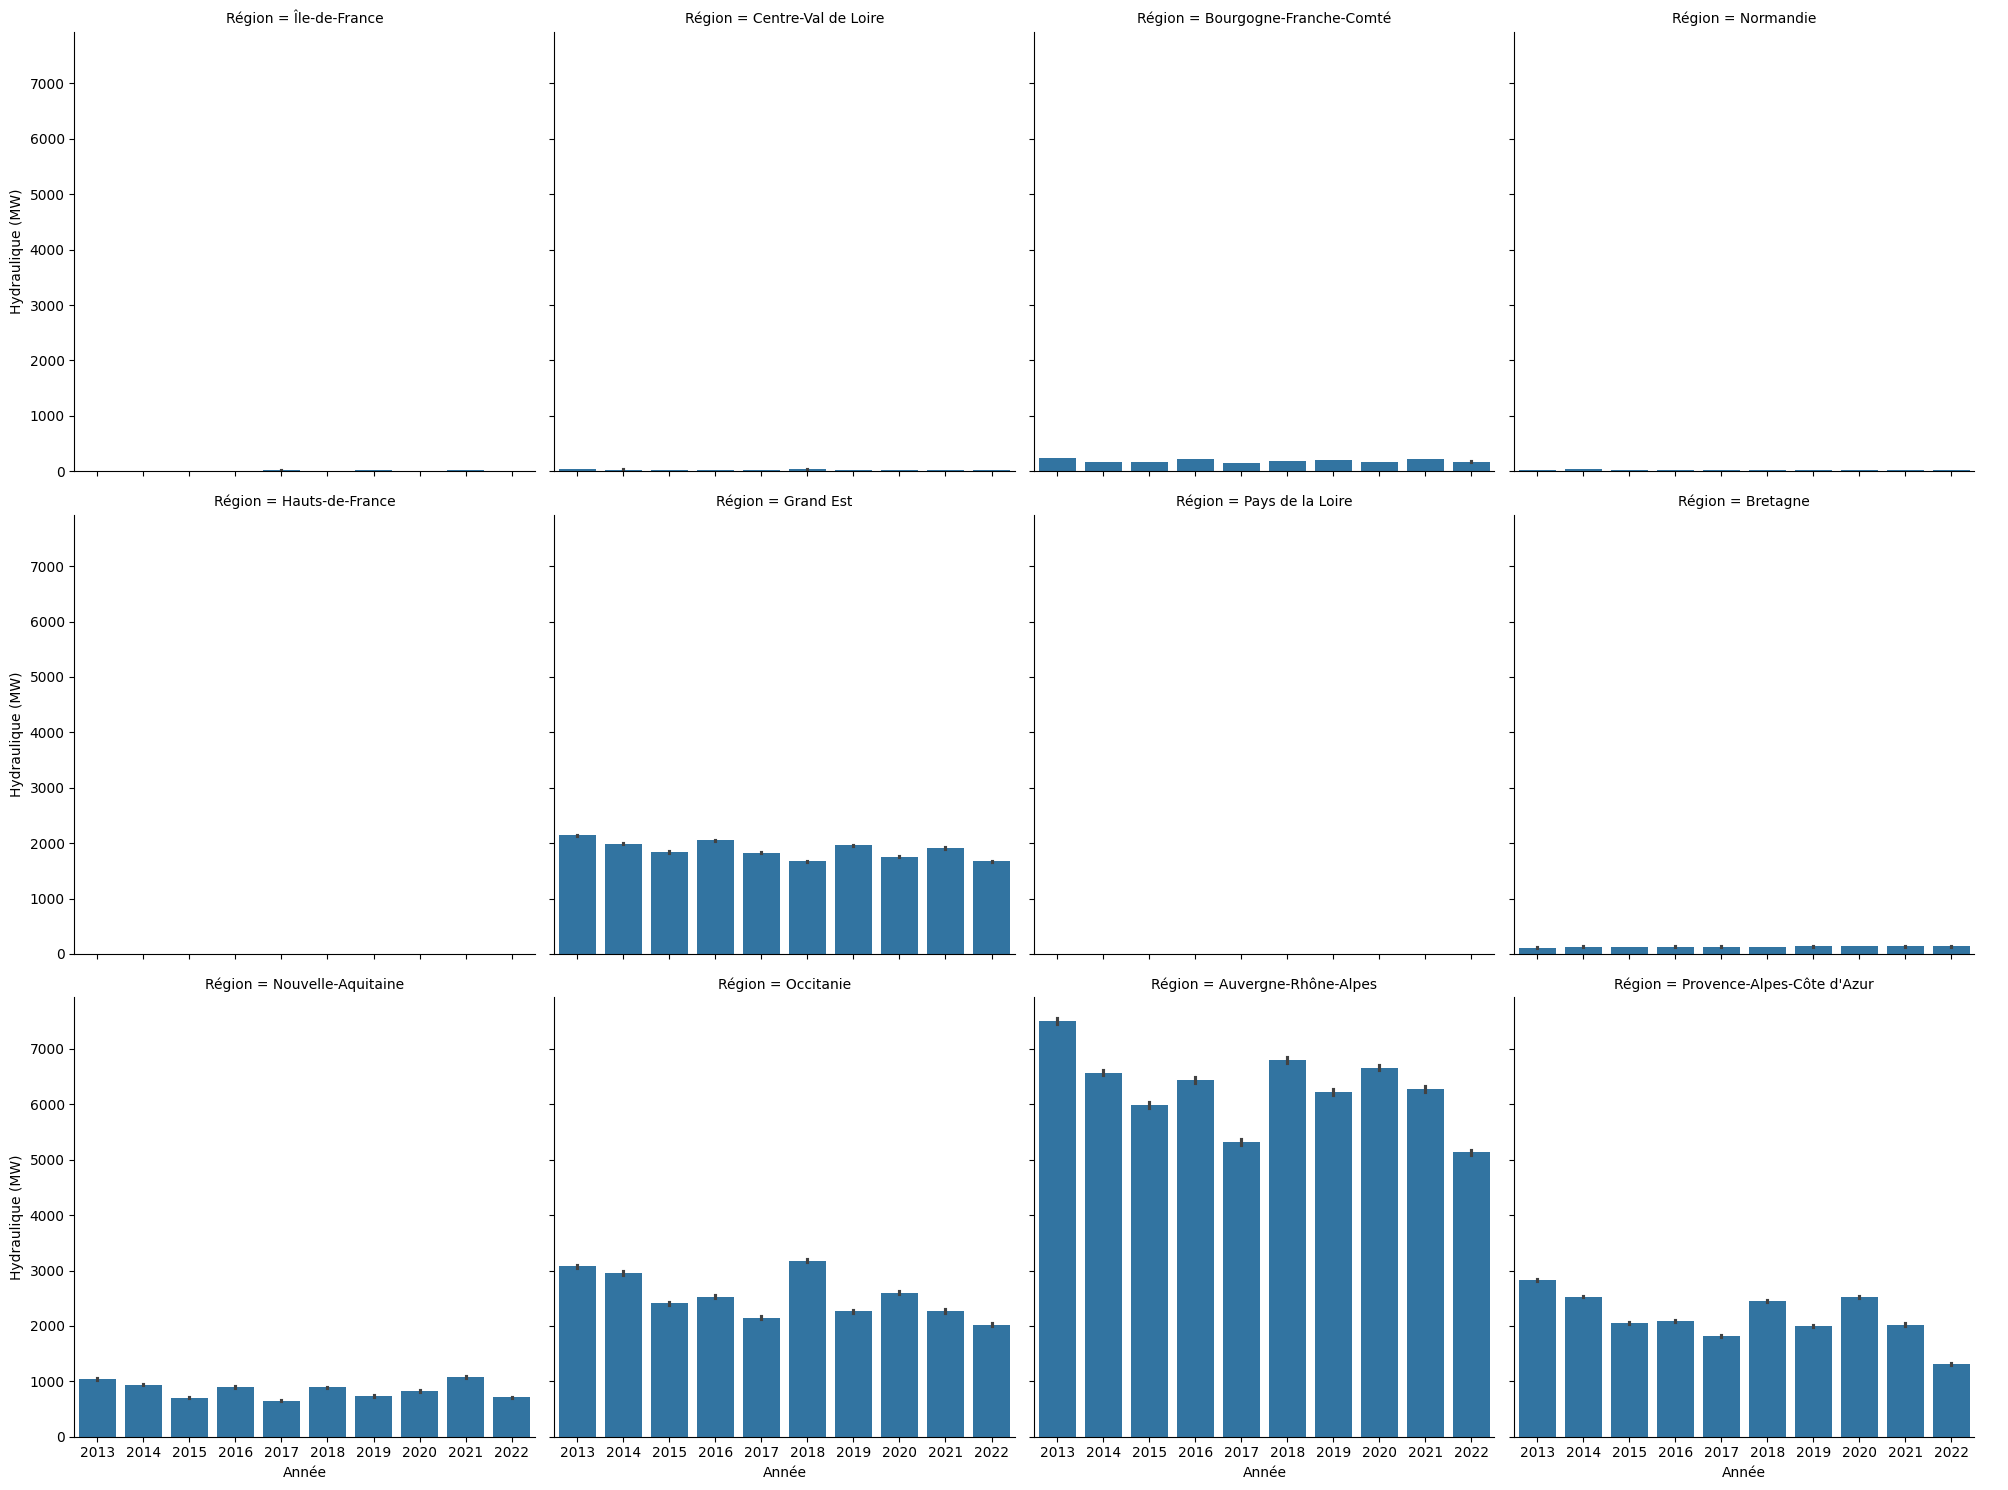

In [ ]:
plt.figure(figsize=(12, 12))
sns.catplot(
    x=df.Date.dt.year, y='Hydraulique (MW)',data=df, kind='bar',col='Région',col_wrap=4
    ).set_xlabels('Année')
plt.show()

## Production et consommation par région

<Figure size 1200x1200 with 0 Axes>

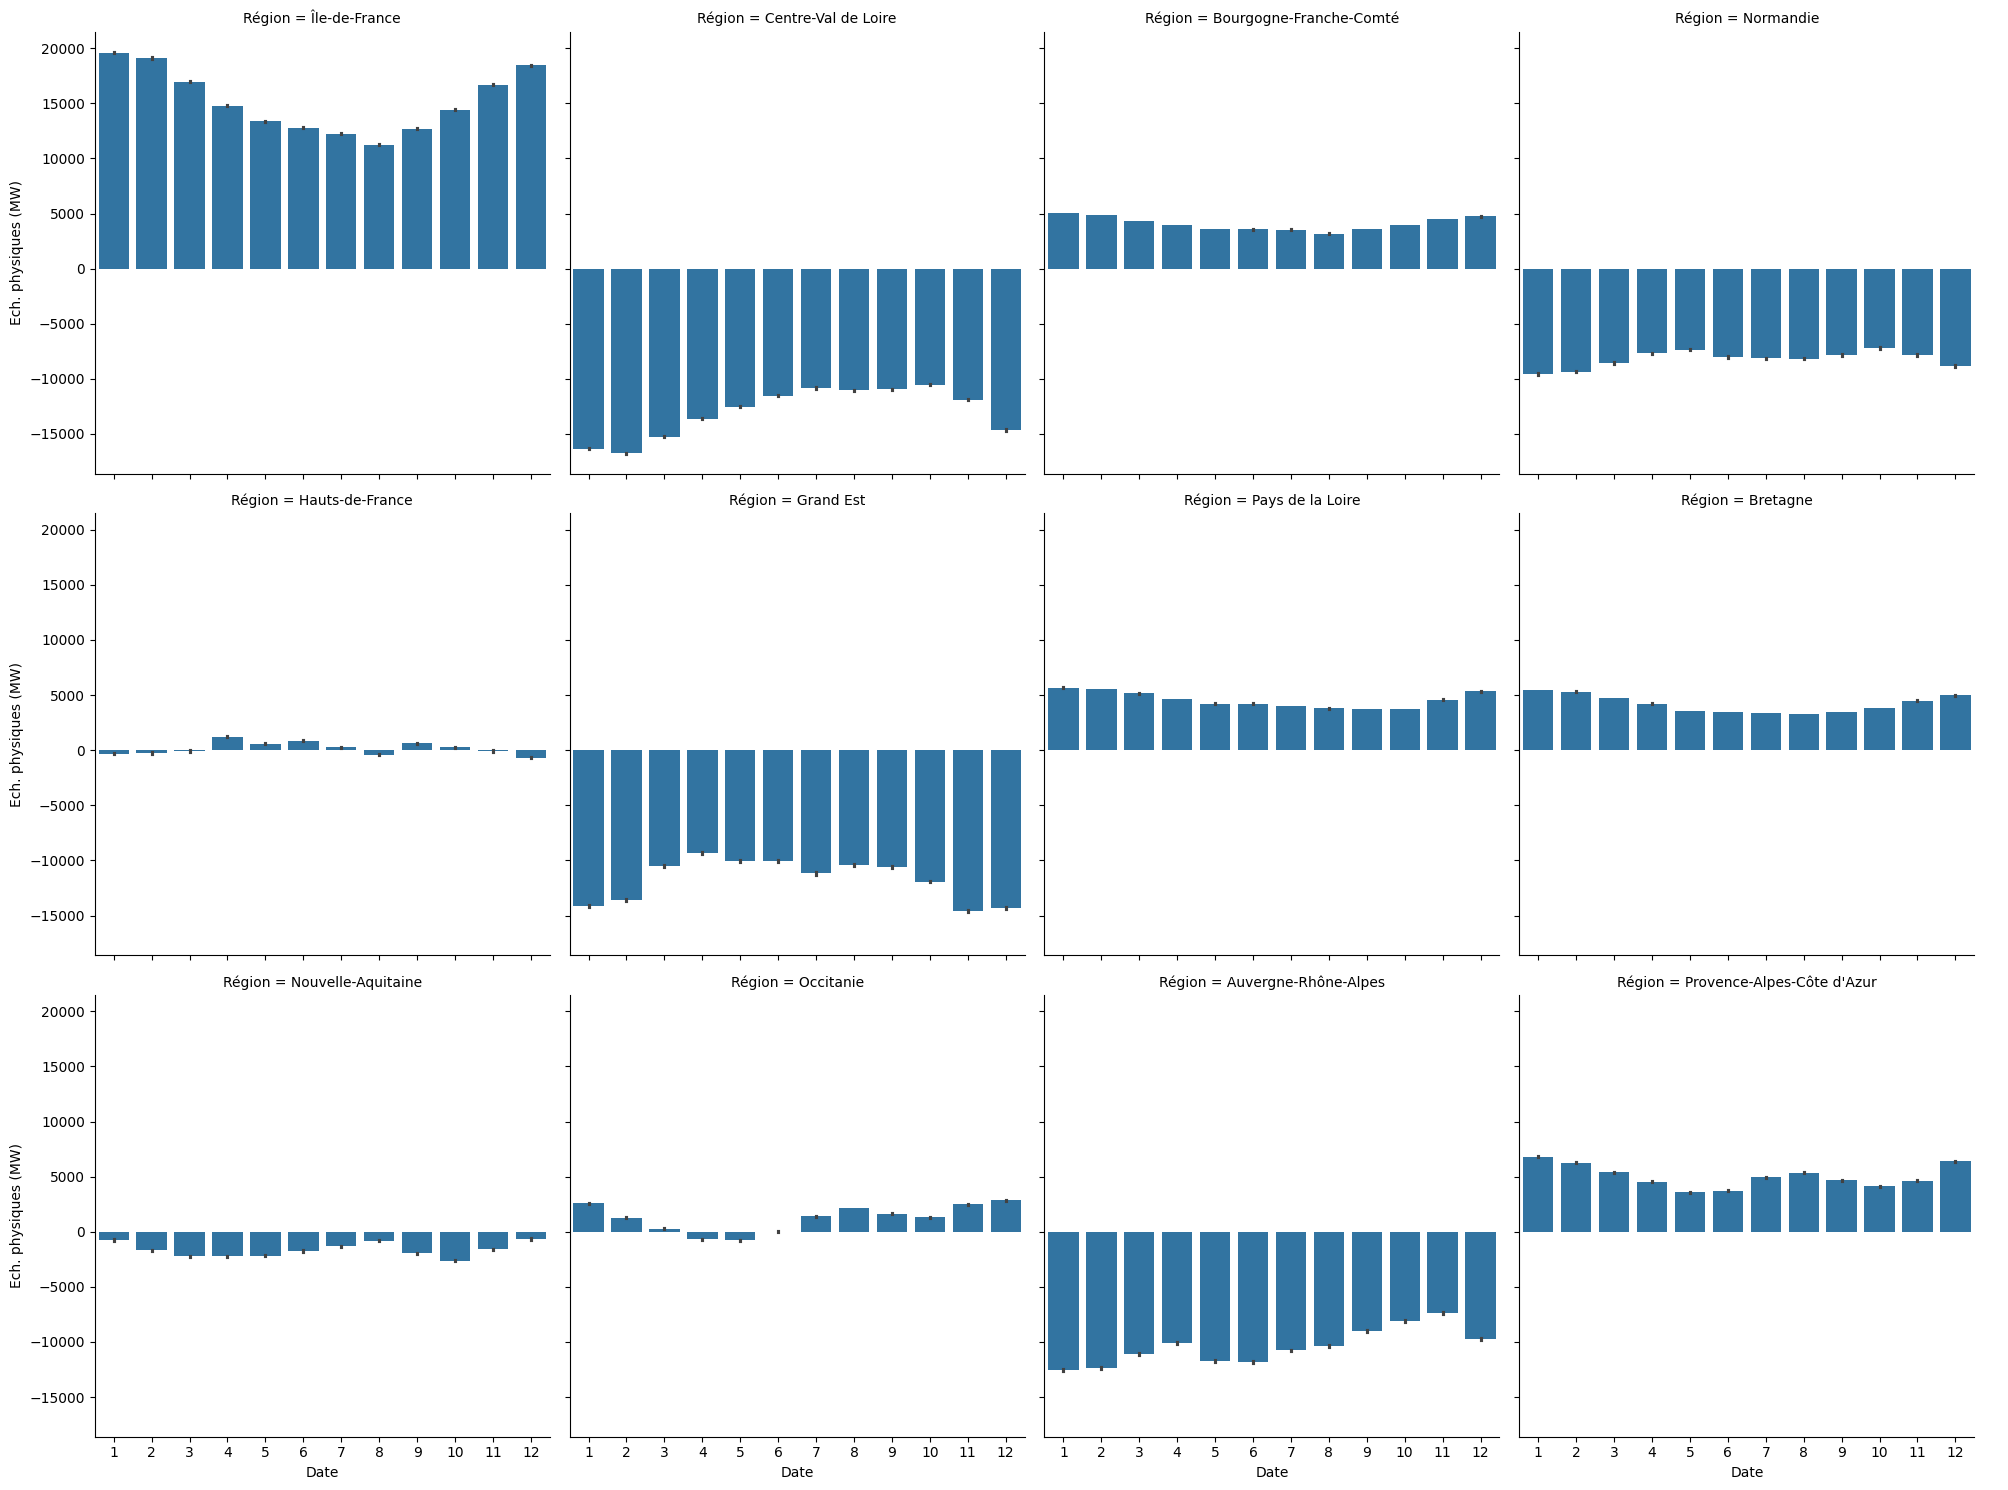

In [ ]:
plt.figure(figsize=(12, 12))
sns.catplot(x=df.Date.dt.month, y='Ech. physiques (MW)',data=df, kind='bar',col='Région',col_wrap=4)
sns.catplot(x=df.Date.dt.month, y='Ech. physiques (MW)',data=df, kind='bar',col='Région',col_wrap=4)
plt.show()

# Analyse par filières

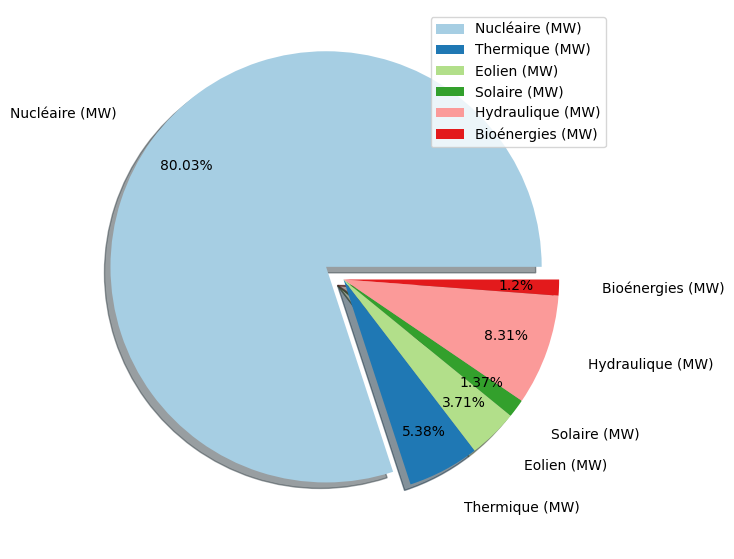

In [ ]:
# Répartition moyenne du mix énergétique
# Objectif métier : voir la part de chaque filière (nucléaire, hydraulique, solaire, etc.) dans la production d’électricité totale.

# Moyennes
moyennes = col_production.mean()

# Camembert
colors = plt.cm.Paired.colors[:6]
labels = moyennes.index
explode = [0.1] + [0]*5

plt.figure(figsize=(7, 7))
plt.pie(moyennes,
        labels=labels,
        colors=colors,
        explode=explode,
        autopct=lambda x: str(round(x, 2)) + '%',
        pctdistance=0.8,
        labeldistance=1.2,
        shadow=True)
plt.legend()
plt.show()

# La production électrique repose principalement sur le nucléaire, qui représente presque 80 % du mix en moyenne.
# Les autres sources (hydraulique, thermique, éolien, solaire et bioénergies) ont un rôle complémentaire, avec une montée progressive des énergies renouvelables.

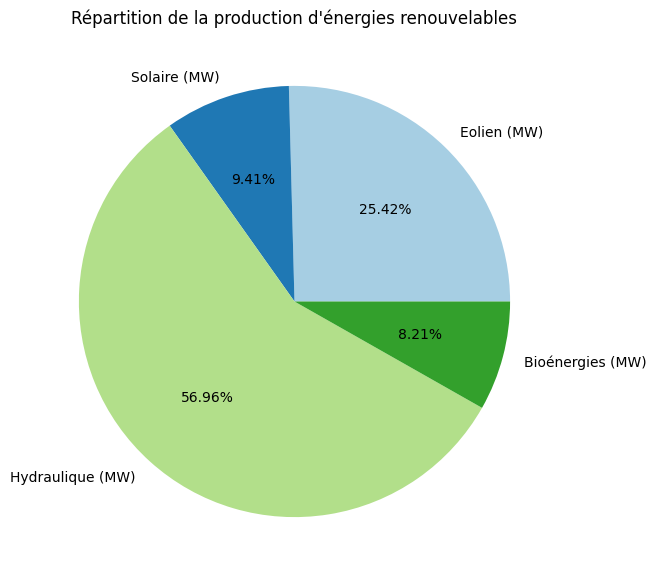

In [ ]:
# Répartition moyenne du mix énergétique pour les energies renouvelables
# Moyennes
moyennes = col_renouvelables.mean()
# Camembert
colors = plt.cm.Paired.colors[:4]
labels = moyennes.index

plt.figure(figsize=(7, 7))
plt.pie(moyennes,
        labels=labels,
        colors=colors,
        autopct=lambda x: str(round(x, 2)) + '%')
plt.title('Répartition de la production d\'énergies renouvelables')
plt.show()

Text(0.5, 1.0, 'Evolution de la production des énergies renouvelables')

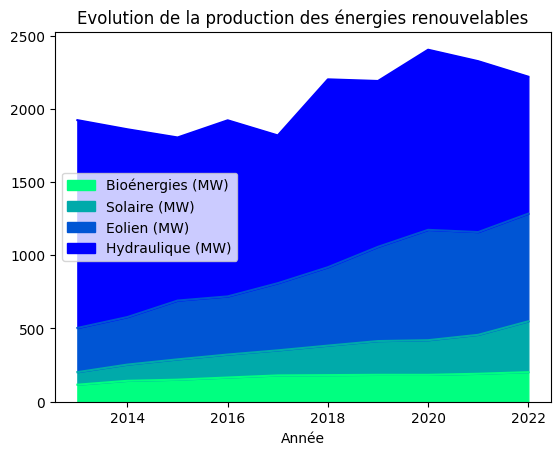

In [ ]:
# Tendance de production des énergies renouvelables
data = pd.concat((col_renouvelables, col_temp), axis=1)
data = data.groupby('Année')[['Bioénergies (MW)','Solaire (MW)','Eolien (MW)',	'Hydraulique (MW)']].mean()
labels = data.index

data.plot(legend=True ,kind='area', colormap='winter_r')
plt.title('Evolution de la production des énergies renouvelables')

# on voit que la production de bioénergies reste assez stable, le solaire et éolien augmentent et l'hydraulique est plus instable (années de sécheresses ?)

Text(0.5, 1.0, 'Part de la production de bioénergies comparée à la production totale')

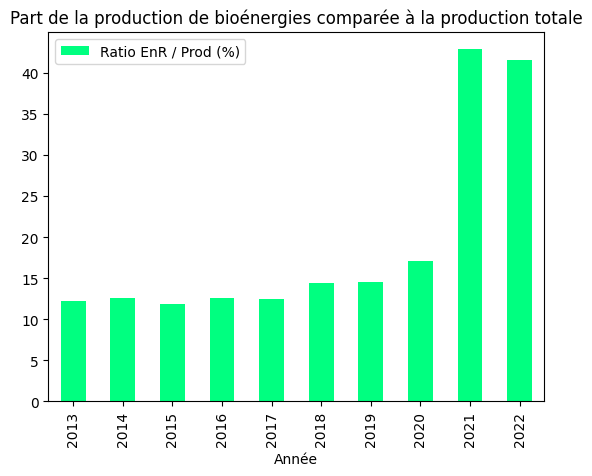

In [ ]:
# Tendance de production des énergies renouvelables vs production totale
data = pd.concat((col_renouvelables, col_temp, df['PROD']), axis=1)
data['EnR'] = data['Eolien (MW)']+data['Solaire (MW)']+data['Hydraulique (MW)']+data['Bioénergies (MW)']
data['Ratio EnR / Prod (%)'] = data['EnR'] / data['PROD'] * 100
data = data.groupby('Année')[['Ratio EnR / Prod (%)']].mean()
labels = data.index

data.plot(legend=True ,kind='bar', colormap='winter_r')
plt.title('Part de la production de bioénergies comparée à la production totale')

# on voit que la part de la production de bioénergies augmente significativement

Text(0.5, 1.0, 'Répartition de la production des énergies renouvelables')

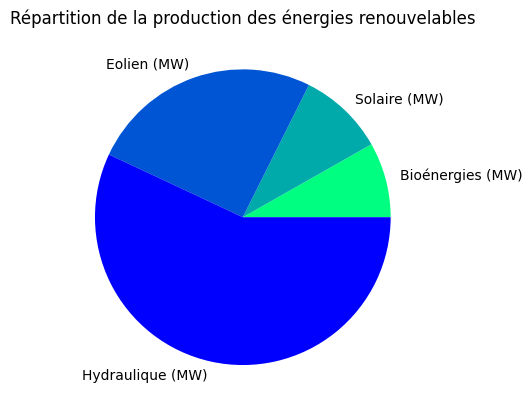

In [ ]:
# Tendance de production des énergies renouvelables
data = pd.concat((col_renouvelables, col_temp), axis=1)
data = data[['Bioénergies (MW)','Solaire (MW)','Eolien (MW)',	'Hydraulique (MW)']].mean()

data.plot(kind='pie', colormap='winter_r')
plt.title('Répartition de la production des énergies renouvelables')

# on voit que la production de bioénergies reste assez stable, le solaire et éolien augmentent et l'hydraulique est plus instable (années de sécheresses ?)

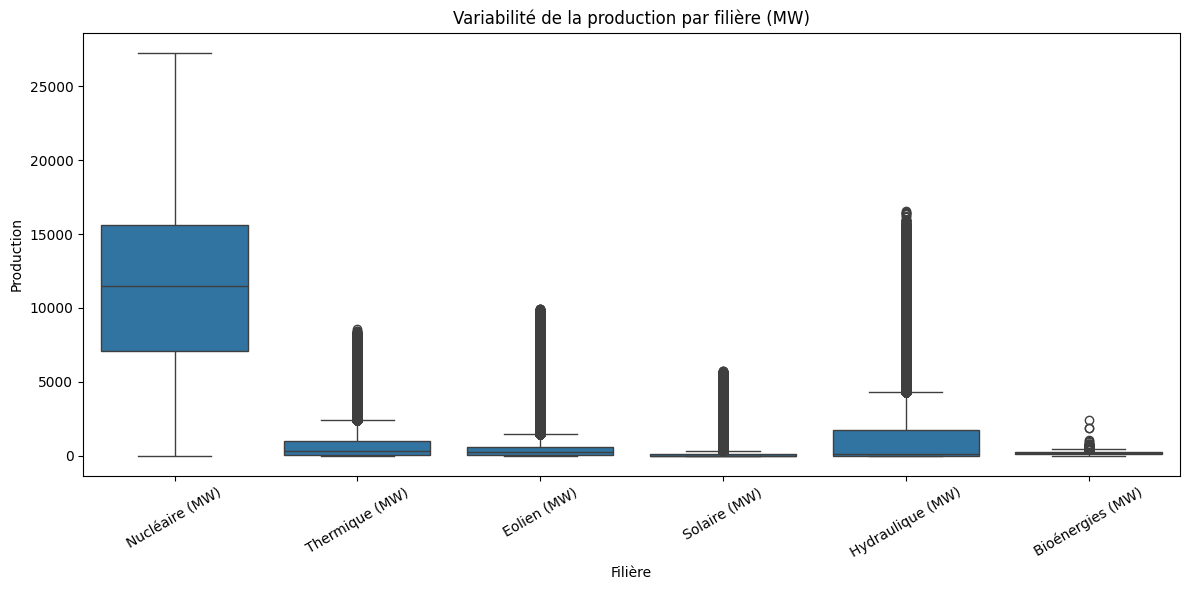

In [ ]:
# Variabilité des filières de production
# Objectif métier : comparer la variabilité de la production selon les filières et selon les heures et jours.

# Préparation des données au format long (melt)
df_long = df.melt(value_vars=col_production, var_name="Filière", value_name="Production")

# Tracé des boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_long, x="Filière", y="Production")
plt.title("Variabilité de la production par filière (MW)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Le graphique montre une forte dispersion des valeurs pour le nucléaire (moustaches longues), ce qui est surprenant, on pourrait s'attendre à ce que cette filière pilotable présente une production stable.
# c'est probablement à cause de périodes de maintenance, d’ajustement à la demande ou que la puissance produite est modulée en fonction du besoin.
# À l’inverse, les filières renouvelables comme le solaire et l’éolien présentent ici une variabilité visuellement plus faible parce qu'elles sont moins puissantes.
# mais ces filières restent intermittentes : elles peuvent passer de 0 à 100 % très rapidement selon l’heure ou la météo.
# Il faut nuancer ce graphique qui montre la variabilité en valeur MW mais pas en fonction de la capacité de production des éoliennes et des panneaux solaires. En proportion, le solaire et l’éolien restent les plus imprévisibles.

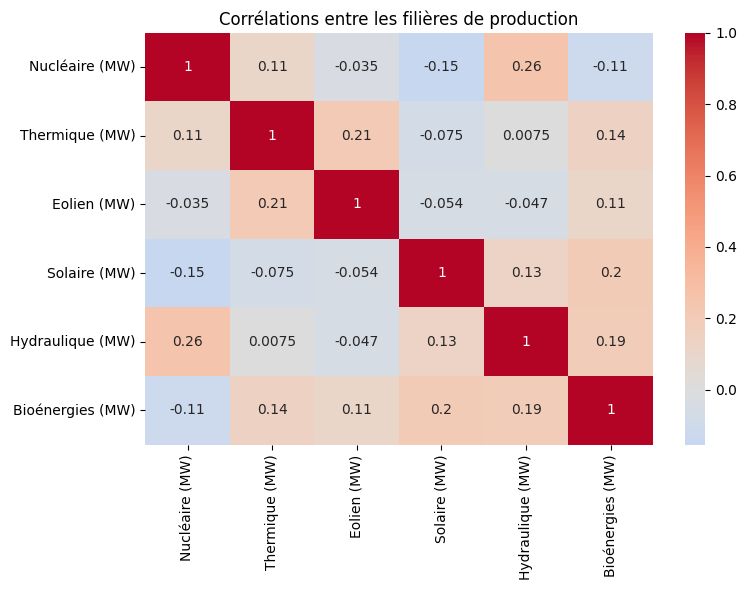

In [ ]:
# Corrélation entre les filières de production
# Objectif métier : identifier les relations entre les différentes sources d’électricité.
# Est-ce que certaines filières se combinent facilement (ex : hydraulique + solaire),
# ou sont antagonistes (ex : thermique activé quand le reste ne suffit pas).

# Calcul de la matrice de corrélation
mat_corr = col_production.corr()

# Tracé de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(mat_corr, annot=True, cmap="coolwarm", center=0)
plt.title("Corrélations entre les filières de production")
plt.tight_layout()
plt.show()

# En regardant cette matrice de corrélation entre les différentes filières de production électrique, on voit qu'il n'y a pas de relation forte.
# On observe une légère corrélation positive entre le nucléaire et l’hydraulique (+0.26), donc ça veut dire que ces deux sources d'énergue peuvent être mobilisées en même temps lors des pics de consommation.
# On observe à l'inverse une légère corrélation négative entre le nucléaire et le solaire (–0.15), donc ça veut dire que la production d'énergie nucléaire est légèrement réduite lorsque la production solaire est importante.
# L'éolien et le solaire, qui sont des énergies renouvelables, ne sont quasiment pas corrélés (-0.054 est proche de 0) donc ça montre que c'est deux sources d'énergie indépendantes et aléatoires influencées par la météo.
# En conclusion, on voit que toutes les corrélations sont faibles donc ça montre la diversité des sources d'énergies mais surtout la complexité de les utiliser simultanément.

# Impact de la population

In [ ]:
# inserton population
dfPop=pd.read_csv("populations-ofgl-regions.csv",sep=";",low_memory=False)
dfPop['insee']=dfPop['insee'].astype(str)
#suppression des colonnes
dfPop = dfPop.drop(columns = ['type', 'Région', 'Population municipale', 'siren','Code Courant Officiel','Code Région','outre_mer','Est une CTU','annee_texte'])

In [ ]:
#ajout année si pas fait en amont sur les données clean [à vérifier]
df['year']=df['Date'].dt.year

In [ ]:
# merge des données sur année et code région
merge=df.merge(dfPop, how='left',left_on=['Code INSEE région','year'], right_on=['insee','Exercice'])

In [ ]:
# préparation et nettoyage
dfFull=merge[merge['Population totale'].isna() == False ] # on retire les lignes où popu NaN
dfFull=dfFull[dfFull['year'] >2015]   # on cible > 2015 pour être homogène et sans trous
dfFull['Conso par Hab (Wh)']=dfFull['Consommation (MW)']/dfFull['Population totale'] * 1000000   #ajout col pour avoir la conso par hab
dfFull['month']=dfFull['Date'].dt.month

<Figure size 1200x1200 with 0 Axes>

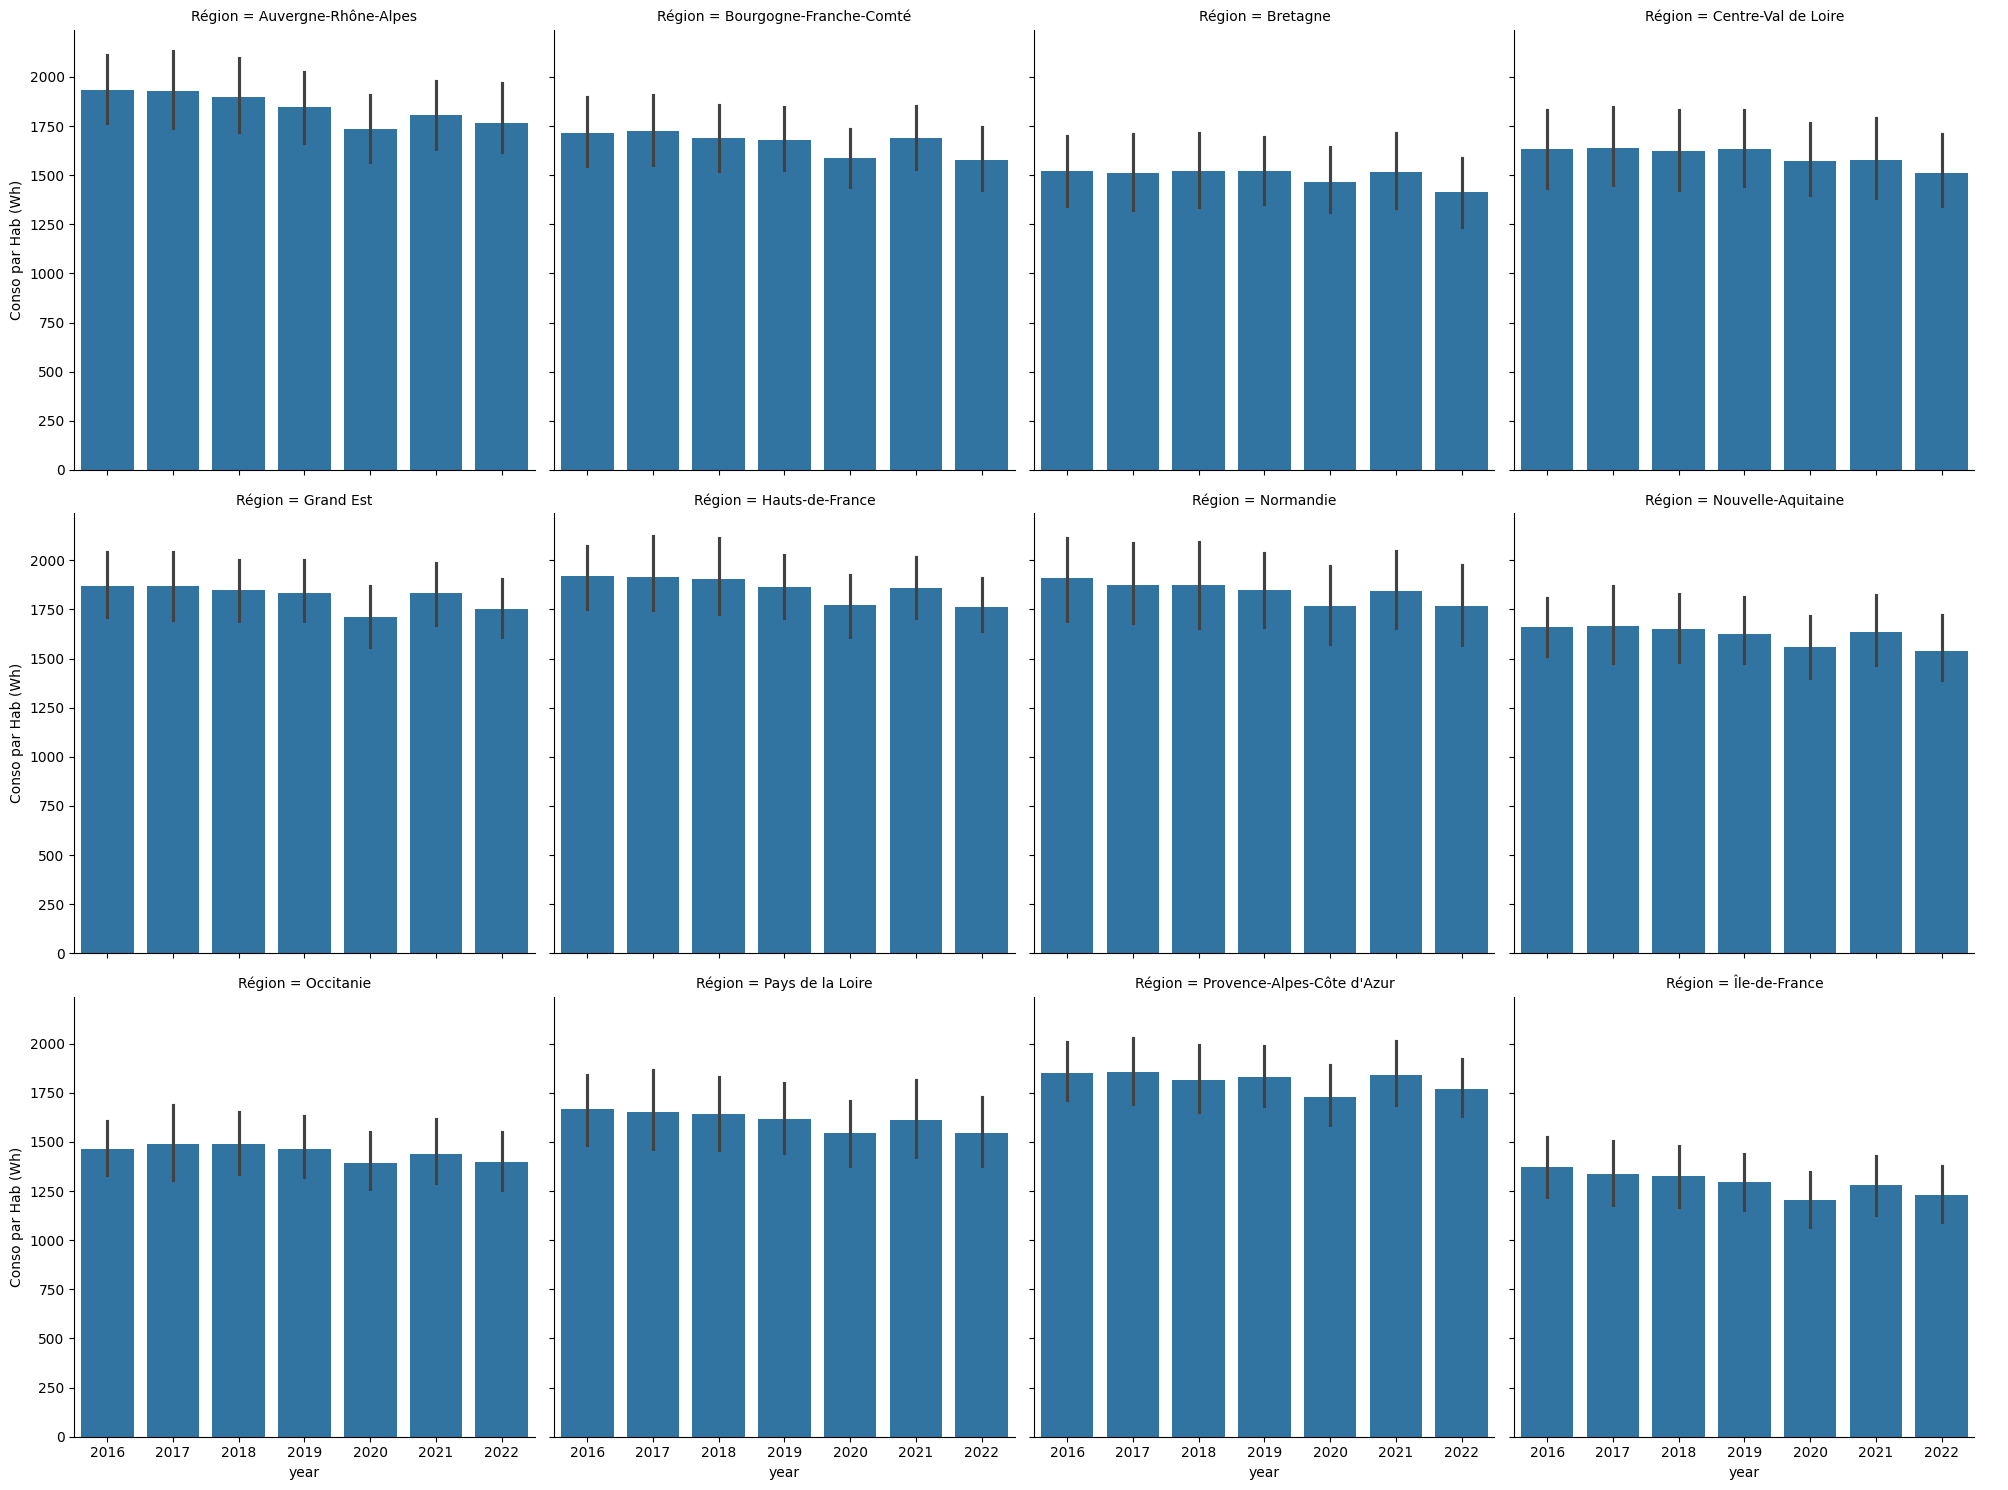

In [ ]:
# Consommation vs Production totale par an et par habitant
# Calcul de la moyenne par mois
df_An= dfFull.groupby(['year','Région','month'])[['Conso par Hab (Wh)', 'Population totale']].mean().reset_index()

plt.figure(figsize=(12, 12))
sns.catplot(x='year', y='Conso par Hab (Wh)',data=df_An, kind='bar',col='Région',col_wrap=4)
plt.show()

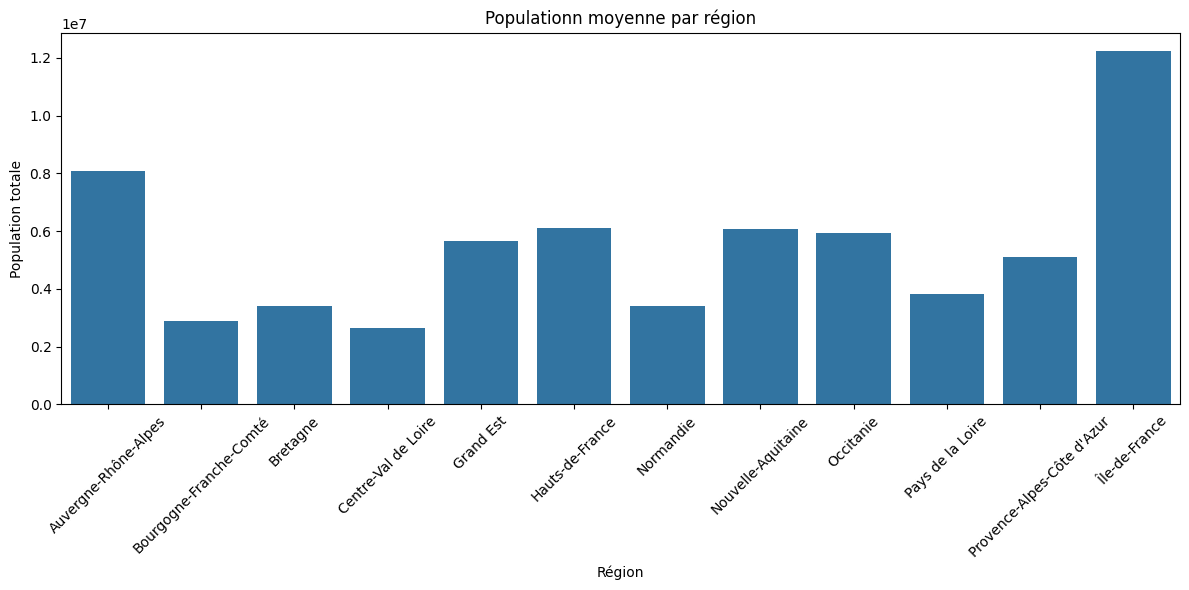

In [ ]:
data = df_An.groupby(['Région'])[['Population totale']].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data = data, x='Région', y='Population totale')
plt.xticks(rotation=45)
plt.title("Populationn moyenne par région")
plt.tight_layout()
plt.show()

In [ ]:
# Calculer la moyenne de conso/hab par région
mean_cons = df_An.groupby('Région')['Conso par Hab (Wh)'].mean()
# Trier par ordre décroissant
order = mean_cons.sort_values(ascending=False).index.tolist()
mean_cons = pd.DataFrame(mean_cons).sorted_values('Conso par Hab (Wh)')
#corrélation population vs. consommation
sns.scatterplot(x='Région', y='Conso par Hab (Wh)',data=data)

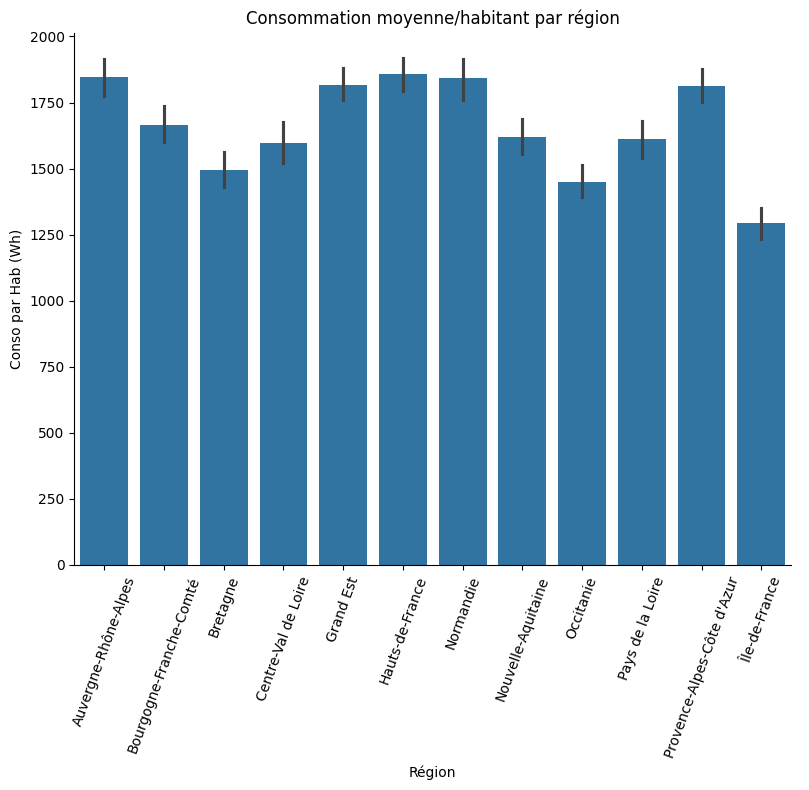

In [ ]:
# histogramme de la conso moyenne/hab par région
sns.catplot(x='Région', y='Conso par Hab (Wh)',data=df_An, kind='bar',height=8)
plt.xticks(rotation=70)
plt.title("Consommation moyenne/habitant par région")
plt.tight_layout()
plt.show()

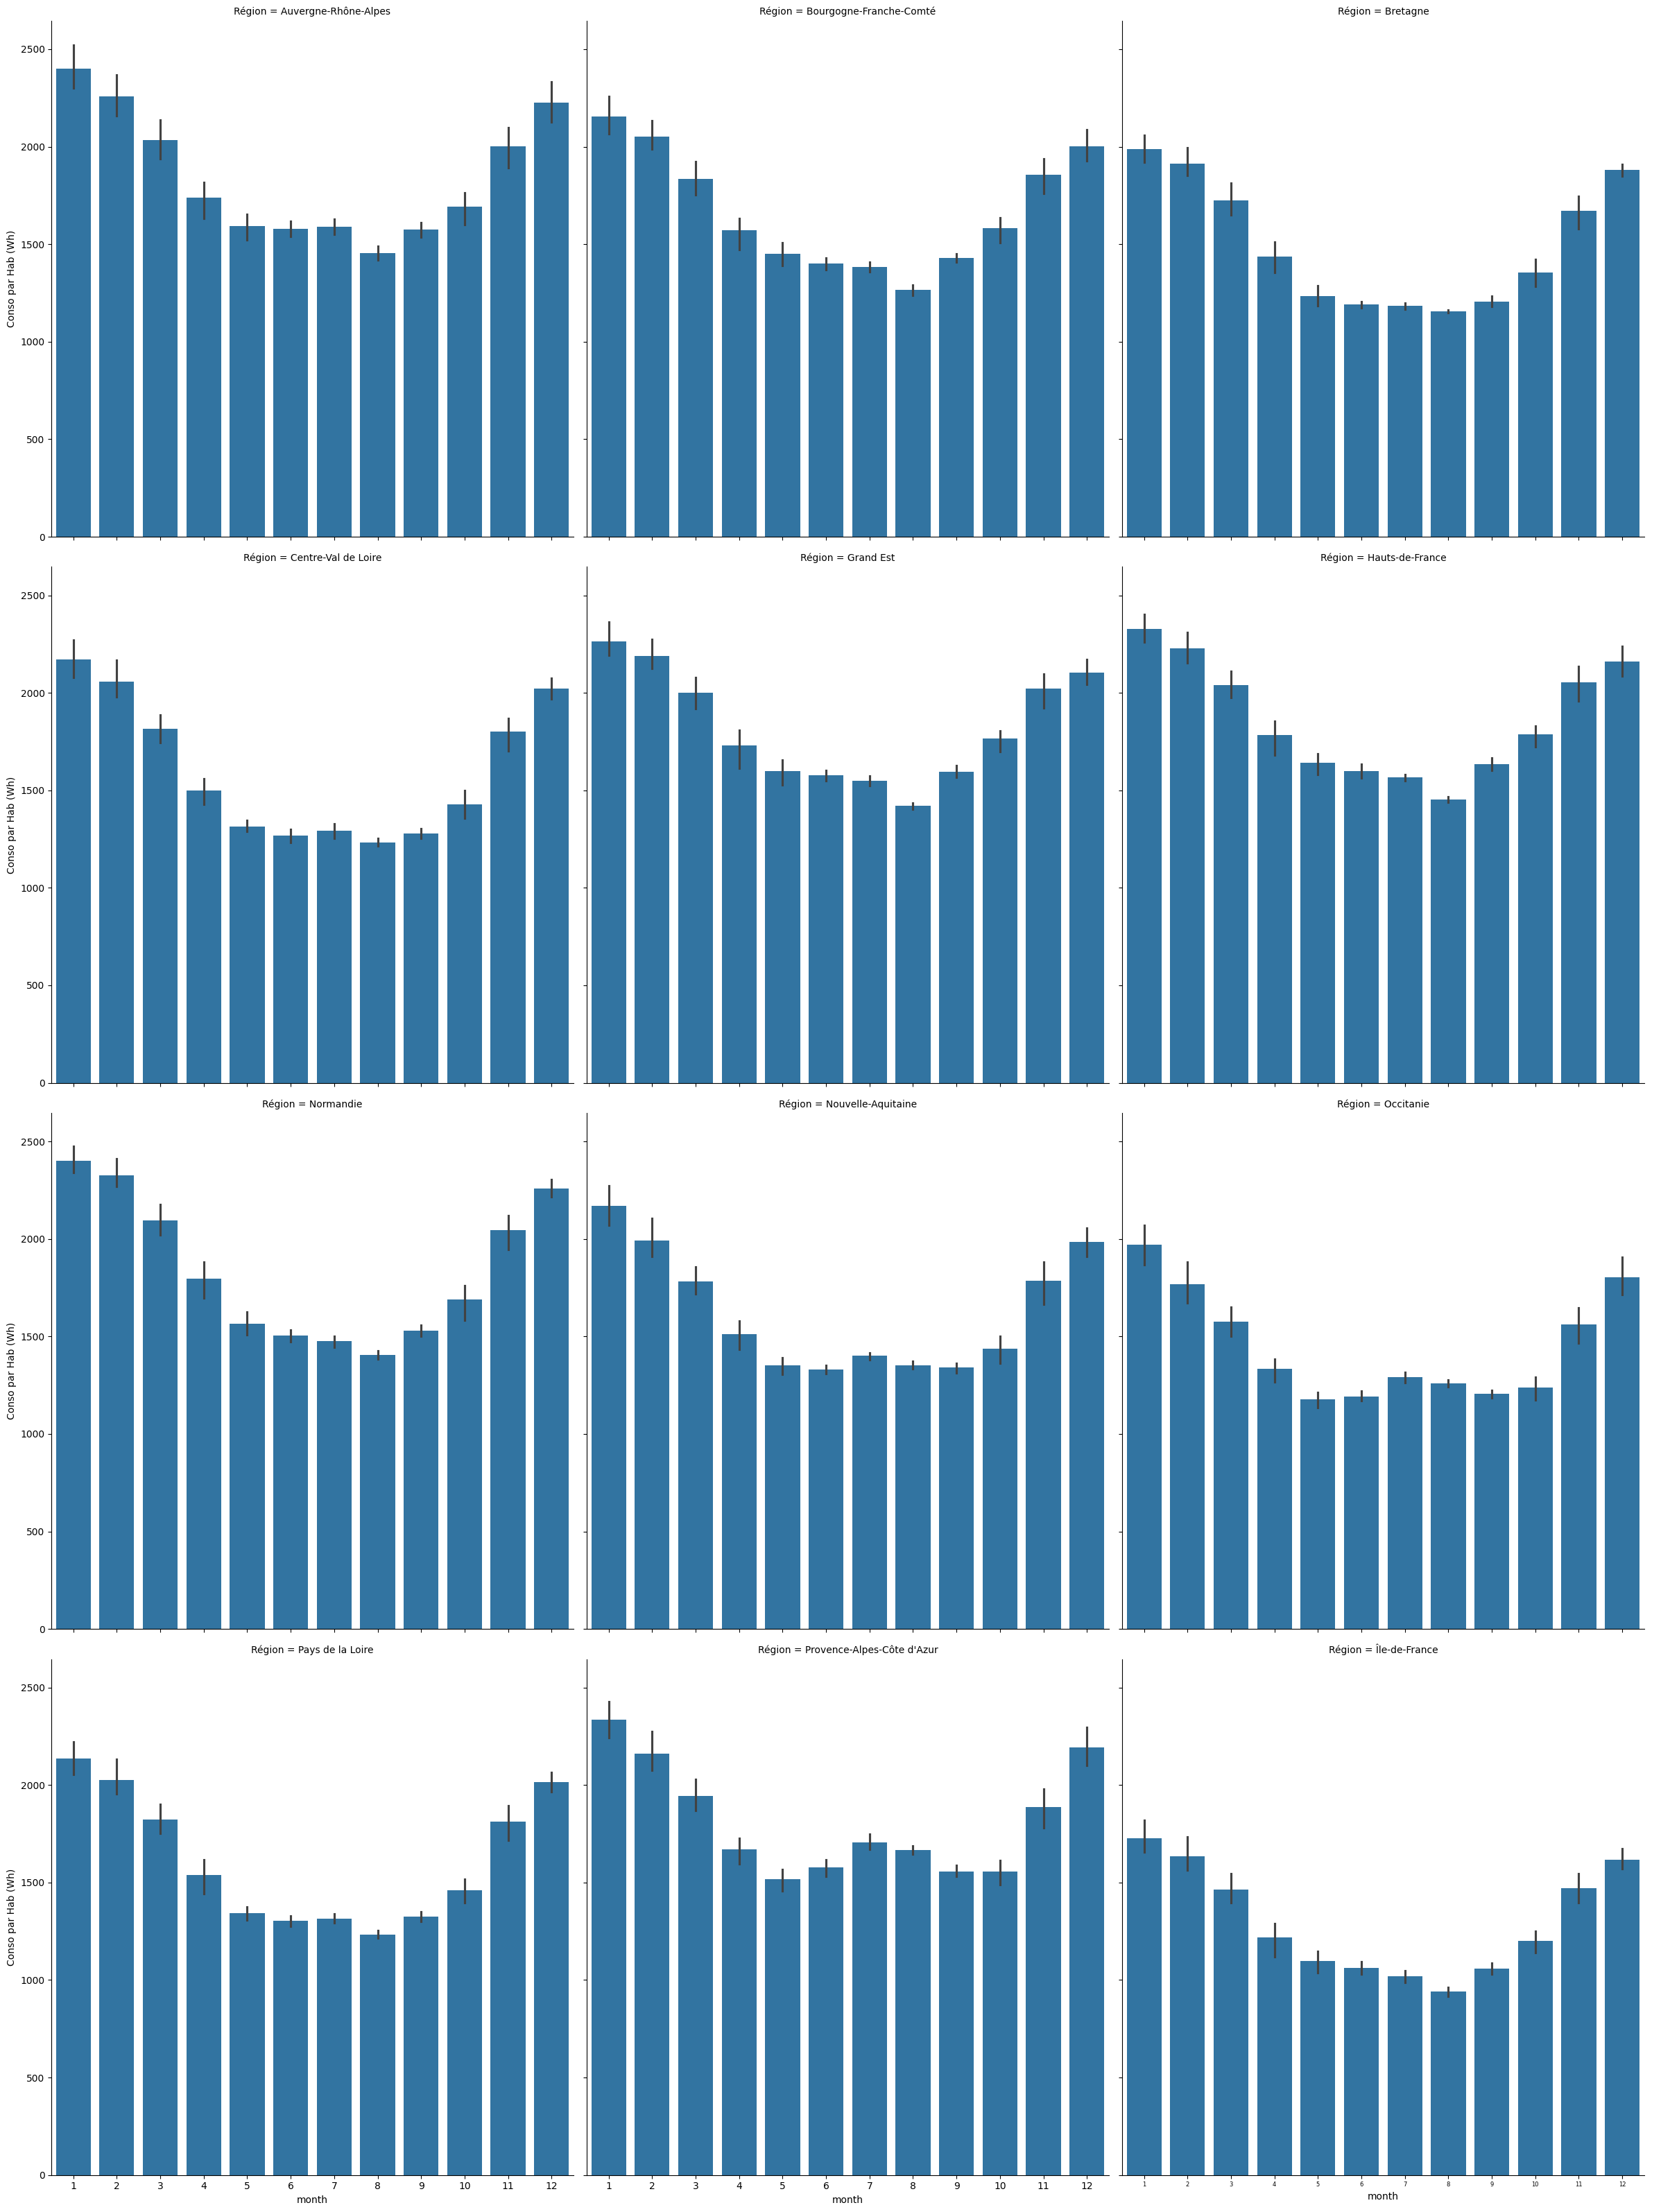

In [ ]:
# histogramme de la conso moyenne/hab par mois par régions
sns.catplot(x='month', y='Conso par Hab (Wh)',data=df_An, kind='bar',height=8,col='Région',col_wrap=3)
plt.xticks(fontsize=6)
plt.show()

Impact de la population sur la consommation et la  production d'énergie

In [ ]:
# préparation

#  pour chaque région, on additionne toute la production et toute la consommation (sur toute la période) pour n’avoir qu’une seule ligne par région.
df_energy_by_region = df.groupby('Région')[['PROD', 'CONSO']].sum().reset_index()

# Garder uniquement la dernière année par région,pour ne pas avoir trop de résultats
population_latest = population_df.sort_values('annee_texte').drop_duplicates(subset='Région', keep='last')

#  garder uniquement les colonnes utiles : Région et Population totale.
population_latest = population_latest[['Région', 'Population totale']]

# je fusionne les deux DataFrames :
df_merged = pd.merge(df_energy_by_region, population_latest, on='Région', how='inner')


# trier les régions de la plus petite à la plus grande population
df_merged = df_merged.sort_values(by='Population totale')

NameError: name 'dfPop' is not defined

In [ ]:
#Affichage


plt.figure(figsize=(14, 10))

# Ajouter les noms des régions sur les points
for i, row in df_merged.iterrows():
    plt.text(row['Population totale'], row['CONSO'], row['Région'], fontsize=9, color='darkred', ha='left', va='bottom')
    plt.text(row['Population totale'], row['PROD'], row['Région'], fontsize=9, color='darkgreen', ha='right', va='top')

# Points et droite pour la consommation
sns.regplot(
    data=df_merged,
    x='Population totale',
    y='CONSO',
    scatter_kws={'color': 'red'},
    line_kws={'color': 'darkred', 'linestyle': '--'},
    ci=None,
    label='Consommation'
)

# Points et droite pour la production
sns.regplot(
    data=df_merged,
    x='Population totale',
    y='PROD',
    scatter_kws={'color': 'green'},
    line_kws={'color': 'darkgreen', 'linestyle': '--'},
    ci=None,
    label='Production'
)

# Mise en forme
plt.title("Population vs Consommation et Production d'Énergie")
plt.xlabel("Population totale")
plt.ylabel("Énergie (MW)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




NameError: name 'df_merged' is not defined

<Figure size 1400x1000 with 0 Axes>